In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In questo notebook studio l'eccentricità dei dichi con cui sto lavorando. In particolare medio sui valori di eccentricità che vengono assunti nell'intorno del valor vero del semi-asse maggiore

In [2]:
massr = np.array(['0.1', '0.33', '0.5', '1', '2', '3', '10'])
par_rag = 0.999

<center>

# <span style="color:blue;"> Viscosità massima </span>

<center>

### Eccentricità binaria: e = 0

In [3]:
num = np.array([41, 41, 41, 41, 41, 41, 41])
rmin = np.array([0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
rmax = np.array([3.5, 4.0, 5.0, 8.0, 7.0, 7.0, 7.0])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])
sax_A2_e0 = np.zeros(7)

for h in range(0, len(massr)):

    rag = np.zeros(num[h])
    for k in range(0, num[h]):

        rho = np.fromfile("Alpha-2/NoEcc/MR"+massr[h]+"/gasdens"+str(60+k)+".dat").reshape(384, 1152)
        vx = np.fromfile("Alpha-2/NoEcc/MR"+massr[h]+"/gasvx"+str(60+k)+".dat").reshape(384, 1152)
        vy = np.fromfile("Alpha-2/NoEcc/MR"+massr[h]+"/gasvy"+str(60+k)+".dat").reshape(384, 1152)

        #Creo la griglia radiale corretta
        r = np.linspace(rmin[h], rmax[h], 385)
        r_plot = np.zeros((384, 1152))
        for i in range(0, 384):
            for j in range(0, 1152):
                r_plot[i, j] = (r[i+1] + r[i])/2

        #Valuto area delle celle
        area = np.zeros((384, 1152))
        for i in range(0, 383):
            appo = np.pi * (r[i+1]**2 - r[i]**2)/1152
            for j in range(0, 1152):
                area[i, j] = appo


        #Calcolo energia e massa delle cellette
        ene = 0.5 * (vx**2 + vy**2) - 1.0/r_plot
        mas = rho * area

        #Calcolo il semi-asse
        ax = - 1.0/(2 * ene * dist[h])
        ax.reshape(384 * 1152)
        mas.reshape(384 * 1152)

        #Creo contenitore per masse progressive 
        m_prog = []
        sax_mag = np.linspace(0, 0.5, 1000)

        #Creo le masse progressive
        for i in range(0, len(sax_mag)):
            m_prog.append(mas[ax < sax_mag[i]].sum())

        m_prog = np.array(m_prog)
        for i in range(0, len(sax_mag)):
            if m_prog[i] >= 0.999 * m_prog[999]:
                ind = i
                rag[k] = sax_mag[ind]
                break
        
    sax_A2_e0[h] = rag.sum()/num[h]
    print("Il semi-asse maggiore del disco con mass-ratio " + massr[h] + " è: " + str(round(sax_A2_e0[h], 3)) + " a")


Il semi-asse maggiore del disco con mass-ratio 0.1 è: 0.15 a
Il semi-asse maggiore del disco con mass-ratio 0.33 è: 0.218 a
Il semi-asse maggiore del disco con mass-ratio 0.5 è: 0.245 a
Il semi-asse maggiore del disco con mass-ratio 1 è: 0.298 a
Il semi-asse maggiore del disco con mass-ratio 2 è: 0.354 a
Il semi-asse maggiore del disco con mass-ratio 3 è: 0.387 a
Il semi-asse maggiore del disco con mass-ratio 10 è: 0.481 a


### Eccentricità binaria: e = 0.3

In [4]:
num = np.array([41, 41, 41, 41, 41, 41, 41])
rmax = np.array([3.0, 3.0, 3.5, 5.0, 5.0, 5.0, 6.0])
rmin = np.array([0.3, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])
sax_A2_e3 = np.zeros(7)

for h in range(0, len(massr)):

    rag = np.zeros(num[h])
    for k in range(0, num[h]):

        rho = np.fromfile("Alpha-2/MedEcc/MR"+massr[h]+"/gasdens"+str(60+k)+".dat").reshape(384, 1152)
        vx = np.fromfile("Alpha-2/MedEcc/MR"+massr[h]+"/gasvx"+str(60+k)+".dat").reshape(384, 1152)
        vy = np.fromfile("Alpha-2/MedEcc/MR"+massr[h]+"/gasvy"+str(60+k)+".dat").reshape(384, 1152)

        #Creo la griglia radiale corretta
        r = np.linspace(rmin[h], rmax[h], 385)
        r_plot = np.zeros((384, 1152))
        for i in range(0, 384):
            for j in range(0, 1152):
                r_plot[i, j] = (r[i+1] + r[i])/2

        #Valuto area delle celle
        area = np.zeros((384, 1152))
        for i in range(0, 383):
            appo = np.pi * (r[i+1]**2 - r[i]**2)/1152
            for j in range(0, 1152):
                area[i, j] = appo


        #Calcolo energia e massa delle cellette
        ene = 0.5 * (vx**2 + vy**2) - 1.0/r_plot
        mas = rho * area

        #Calcolo il semi-asse
        ax = - 1.0/(2 * ene * dist[h])
        ax.reshape(384 * 1152)
        mas.reshape(384 * 1152)

        #Creo contenitore per masse progressive 
        m_prog = []
        sax_mag = np.linspace(0, 0.5, 1000)

        #Creo le masse progressive
        for i in range(0, len(sax_mag)):
            m_prog.append(mas[ax < sax_mag[i]].sum())

        m_prog = np.array(m_prog)
        for i in range(0, len(sax_mag)):
            if m_prog[i] >= 0.999 * m_prog[999]:
                ind = i
                rag[k] = sax_mag[ind]
                break
        
    sax_A2_e3[h] = rag.sum()/num[h]
    print("Il semi-asse maggiore del disco con mass-ratio " + massr[h] + " è: " + str(round(sax_A2_e3[h], 3)) + " a")


Il semi-asse maggiore del disco con mass-ratio 0.1 è: 0.119 a
Il semi-asse maggiore del disco con mass-ratio 0.33 è: 0.177 a
Il semi-asse maggiore del disco con mass-ratio 0.5 è: 0.198 a
Il semi-asse maggiore del disco con mass-ratio 1 è: 0.239 a
Il semi-asse maggiore del disco con mass-ratio 2 è: 0.269 a
Il semi-asse maggiore del disco con mass-ratio 3 è: 0.304 a
Il semi-asse maggiore del disco con mass-ratio 10 è: 0.384 a


### Eccentricità binaria: e = 0.6

In [5]:
num = np.array([41, 41, 41, 41, 41, 41, 41])
rmax = np.array([2.0, 2.5, 3.0, 4.0, 4.0, 4.0, 5.0])
rmin = np.array([0.2, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])
sax_A2_e6 = np.zeros(7)

for h in range(0, len(massr)):

    rag = np.zeros(num[h])
    for k in range(0, num[h]):

        rho = np.fromfile("Alpha-2/HighEcc/MR"+massr[h]+"/gasdens"+str(60+k)+".dat").reshape(384, 1152)
        vx = np.fromfile("Alpha-2/HighEcc/MR"+massr[h]+"/gasvx"+str(60+k)+".dat").reshape(384, 1152)
        vy = np.fromfile("Alpha-2/HighEcc/MR"+massr[h]+"/gasvy"+str(60+k)+".dat").reshape(384, 1152)

        #Creo la griglia radiale corretta
        r = np.linspace(rmin[h], rmax[h], 385)
        r_plot = np.zeros((384, 1152))
        for i in range(0, 384):
            for j in range(0, 1152):
                r_plot[i, j] = (r[i+1] + r[i])/2

        #Valuto area delle celle
        area = np.zeros((384, 1152))
        for i in range(0, 383):
            appo = np.pi * (r[i+1]**2 - r[i]**2)/1152
            for j in range(0, 1152):
                area[i, j] = appo


        #Calcolo energia e massa delle cellette
        ene = 0.5 * (vx**2 + vy**2) - 1.0/r_plot
        mas = rho * area

        #Calcolo il semi-asse
        ax = - 1.0/(2 * ene * dist[h])
        ax.reshape(384 * 1152)
        mas.reshape(384 * 1152)

        #Creo contenitore per masse progressive 
        m_prog = []
        sax_mag = np.linspace(0, 0.5, 1000)

        #Creo le masse progressive
        for i in range(0, len(sax_mag)):
            m_prog.append(mas[ax < sax_mag[i]].sum())

        m_prog = np.array(m_prog)
        for i in range(0, len(sax_mag)):
            if m_prog[i] >= 0.999 * m_prog[999]:
                ind = i
                rag[k] = sax_mag[ind]
                break
        
    sax_A2_e6[h] = rag.sum()/num[h]
    print("Il semi-asse maggiore del disco con mass-ratio " + massr[h] + " è: " + str(round(sax_A2_e6[h], 3)) + " a")


Il semi-asse maggiore del disco con mass-ratio 0.1 è: 0.071 a
Il semi-asse maggiore del disco con mass-ratio 0.33 è: 0.104 a
Il semi-asse maggiore del disco con mass-ratio 0.5 è: 0.121 a
Il semi-asse maggiore del disco con mass-ratio 1 è: 0.142 a
Il semi-asse maggiore del disco con mass-ratio 2 è: 0.163 a
Il semi-asse maggiore del disco con mass-ratio 3 è: 0.184 a
Il semi-asse maggiore del disco con mass-ratio 10 è: 0.237 a


<center>

# <span style="color:blue;"> Viscosità media </span>

<center>

### Eccentricità binaria: e = 0.0

In [6]:
num = np.array([41, 41, 41, 41, 41, 41, 41])
rmin = np.array([0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
rmax = np.array([3.5, 4.0, 4.0, 8.0, 7.0, 7.0, 7.0])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])
sax_A3_e0 = np.zeros(7)

for h in range(0, len(massr)):

    rag = np.zeros(num[h])
    for k in range(0, num[h]):

        rho = np.fromfile("Alpha-3/NoEcc/MR"+massr[h]+"/gasdens"+str(60+k)+".dat").reshape(384, 1152)
        vx = np.fromfile("Alpha-3/NoEcc/MR"+massr[h]+"/gasvx"+str(60+k)+".dat").reshape(384, 1152)
        vy = np.fromfile("Alpha-3/NoEcc/MR"+massr[h]+"/gasvy"+str(60+k)+".dat").reshape(384, 1152)

        #Creo la griglia radiale corretta
        r = np.linspace(rmin[h], rmax[h], 385)
        r_plot = np.zeros((384, 1152))
        for i in range(0, 384):
            for j in range(0, 1152):
                r_plot[i, j] = (r[i+1] + r[i])/2

        #Valuto area delle celle
        area = np.zeros((384, 1152))
        for i in range(0, 383):
            appo = np.pi * (r[i+1]**2 - r[i]**2)/1152
            for j in range(0, 1152):
                area[i, j] = appo


        #Calcolo energia e massa delle cellette
        ene = 0.5 * (vx**2 + vy**2) - 1.0/r_plot
        mas = rho * area

        #Calcolo il semi-asse
        ax = - 1.0/(2 * ene * dist[h])
        ax.reshape(384 * 1152)
        mas.reshape(384 * 1152)

        #Creo contenitore per masse progressive 
        m_prog = []
        sax_mag = np.linspace(0, 0.5, 1000)

        #Creo le masse progressive
        for i in range(0, len(sax_mag)):
            m_prog.append(mas[ax < sax_mag[i]].sum())

        m_prog = np.array(m_prog)
        for i in range(0, len(sax_mag)):
            if m_prog[i] >= 0.999 * m_prog[999]:
                ind = i
                rag[k] = sax_mag[ind]
                break
        
    sax_A3_e0[h] = rag.sum()/num[h]
    print("Il semi-asse maggiore del disco con mass-ratio " + massr[h] + " è: " + str(round(sax_A3_e0[h], 3)) + " a")



Il semi-asse maggiore del disco con mass-ratio 0.1 è: 0.131 a
Il semi-asse maggiore del disco con mass-ratio 0.33 è: 0.194 a
Il semi-asse maggiore del disco con mass-ratio 0.5 è: 0.22 a
Il semi-asse maggiore del disco con mass-ratio 1 è: 0.267 a
Il semi-asse maggiore del disco con mass-ratio 2 è: 0.321 a
Il semi-asse maggiore del disco con mass-ratio 3 è: 0.354 a
Il semi-asse maggiore del disco con mass-ratio 10 è: 0.452 a


### Eccentricità binaria: e = 0.3

In [7]:
num = np.array([41, 41, 41, 41, 41, 41, 41])
rmax = np.array([3.0, 3.0, 3.5, 5.0, 5.0, 5.0, 6.0])
rmin = np.array([0.3, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])
sax_A3_e3 = np.zeros(7)

for h in range(0, len(massr)):

    rag = np.zeros(num[h])
    for k in range(0, num[h]):

        rho = np.fromfile("Alpha-3/MedEcc/MR"+massr[h]+"/gasdens"+str(60+k)+".dat").reshape(384, 1152)
        vx = np.fromfile("Alpha-3/MedEcc/MR"+massr[h]+"/gasvx"+str(60+k)+".dat").reshape(384, 1152)
        vy = np.fromfile("Alpha-3/MedEcc/MR"+massr[h]+"/gasvy"+str(60+k)+".dat").reshape(384, 1152)

        #Creo la griglia radiale corretta
        r = np.linspace(rmin[h], rmax[h], 385)
        r_plot = np.zeros((384, 1152))
        for i in range(0, 384):
            for j in range(0, 1152):
                r_plot[i, j] = (r[i+1] + r[i])/2

        #Valuto area delle celle
        area = np.zeros((384, 1152))
        for i in range(0, 383):
            appo = np.pi * (r[i+1]**2 - r[i]**2)/1152
            for j in range(0, 1152):
                area[i, j] = appo


        #Calcolo energia e massa delle cellette
        ene = 0.5 * (vx**2 + vy**2) - 1.0/r_plot
        mas = rho * area

        #Calcolo il semi-asse
        ax = - 1.0/(2 * ene * dist[h])
        ax.reshape(384 * 1152)
        mas.reshape(384 * 1152)

        #Creo contenitore per masse progressive 
        m_prog = []
        sax_mag = np.linspace(0, 0.5, 1000)

        #Creo le masse progressive
        for i in range(0, len(sax_mag)):
            m_prog.append(mas[ax < sax_mag[i]].sum())

        m_prog = np.array(m_prog)
        for i in range(0, len(sax_mag)):
            if m_prog[i] >= 0.999 * m_prog[999]:
                ind = i
                rag[k] = sax_mag[ind]
                break
        
    sax_A3_e3[h] = rag.sum()/num[h]
    print("Il semi-asse maggiore del disco con mass-ratio " + massr[h] + " è: " + str(round(sax_A3_e3[h], 3)) + " a")



Il semi-asse maggiore del disco con mass-ratio 0.1 è: 0.102 a
Il semi-asse maggiore del disco con mass-ratio 0.33 è: 0.152 a
Il semi-asse maggiore del disco con mass-ratio 0.5 è: 0.171 a
Il semi-asse maggiore del disco con mass-ratio 1 è: 0.207 a
Il semi-asse maggiore del disco con mass-ratio 2 è: 0.245 a
Il semi-asse maggiore del disco con mass-ratio 3 è: 0.271 a
Il semi-asse maggiore del disco con mass-ratio 10 è: 0.34 a


### Eccentricità binaria: e = 0.6

In [8]:
num = np.array([41, 41, 41, 41, 41, 41, 41])
rmax = np.array([2.0, 2.5, 3.0, 4.0, 4.0, 4.0, 5.0])
rmin = np.array([0.2, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])
sax_A3_e6 = np.zeros(7)

for h in range(0, len(massr)):

    rag = np.zeros(num[h])
    for k in range(0, num[h]):

        rho = np.fromfile("Alpha-3/HighEcc/MR"+massr[h]+"/gasdens"+str(60+k)+".dat").reshape(384, 1152)
        vx = np.fromfile("Alpha-3/HighEcc/MR"+massr[h]+"/gasvx"+str(60+k)+".dat").reshape(384, 1152)
        vy = np.fromfile("Alpha-3/HighEcc/MR"+massr[h]+"/gasvy"+str(60+k)+".dat").reshape(384, 1152)

        #Creo la griglia radiale corretta
        r = np.linspace(rmin[h], rmax[h], 385)
        r_plot = np.zeros((384, 1152))
        for i in range(0, 384):
            for j in range(0, 1152):
                r_plot[i, j] = (r[i+1] + r[i])/2

        #Valuto area delle celle
        area = np.zeros((384, 1152))
        for i in range(0, 383):
            appo = np.pi * (r[i+1]**2 - r[i]**2)/1152
            for j in range(0, 1152):
                area[i, j] = appo


        #Calcolo energia e massa delle cellette
        ene = 0.5 * (vx**2 + vy**2) - 1.0/r_plot
        mas = rho * area

        #Calcolo il semi-asse
        ax = - 1.0/(2 * ene * dist[h])
        ax.reshape(384 * 1152)
        mas.reshape(384 * 1152)

        #Creo contenitore per masse progressive 
        m_prog = []
        sax_mag = np.linspace(0, 0.5, 1000)

        #Creo le masse progressive
        for i in range(0, len(sax_mag)):
            m_prog.append(mas[ax < sax_mag[i]].sum())

        m_prog = np.array(m_prog)
        for i in range(0, len(sax_mag)):
            if m_prog[i] >= par_rag * m_prog[999]:
                ind = i
                rag[k] = sax_mag[ind]
                break
        
    sax_A3_e6[h] = rag.sum()/num[h]
    print("Il semi-asse maggiore del disco con mass-ratio " + massr[h] + " è: " + str(round(sax_A3_e6[h], 3)) + " a")


    

Il semi-asse maggiore del disco con mass-ratio 0.1 è: 0.061 a
Il semi-asse maggiore del disco con mass-ratio 0.33 è: 0.091 a
Il semi-asse maggiore del disco con mass-ratio 0.5 è: 0.103 a
Il semi-asse maggiore del disco con mass-ratio 1 è: 0.122 a
Il semi-asse maggiore del disco con mass-ratio 2 è: 0.144 a
Il semi-asse maggiore del disco con mass-ratio 3 è: 0.159 a
Il semi-asse maggiore del disco con mass-ratio 10 è: 0.201 a


<center>

# <span style="color:blue;"> Viscosità minima </span>

<center>

### Eccentricità binaria: e = 0.0

In [9]:
num = np.array([41, 41, 41, 41, 41, 41, 41])
rmin = np.array([0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
rmax = np.array([3.5, 4.0, 4.0, 8.0, 7.0, 7.0, 7.0])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])
sax_A4_e0 = np.zeros(7)

for h in range(0, len(massr)):

    rag = np.zeros(num[h])
    for k in range(0, num[h]):

        rho = np.fromfile("Alpha-4/NoEcc/MR"+massr[h]+"/gasdens"+str(60+k)+".dat").reshape(384, 1152)
        vx = np.fromfile("Alpha-4/NoEcc/MR"+massr[h]+"/gasvx"+str(60+k)+".dat").reshape(384, 1152)
        vy = np.fromfile("Alpha-4/NoEcc/MR"+massr[h]+"/gasvy"+str(60+k)+".dat").reshape(384, 1152)

        #Creo la griglia radiale corretta
        r = np.linspace(rmin[h], rmax[h], 385)
        r_plot = np.zeros((384, 1152))
        for i in range(0, 384):
            for j in range(0, 1152):
                r_plot[i, j] = (r[i+1] + r[i])/2

        #Valuto area delle celle
        area = np.zeros((384, 1152))
        for i in range(0, 383):
            appo = np.pi * (r[i+1]**2 - r[i]**2)/1152
            for j in range(0, 1152):
                area[i, j] = appo


        #Calcolo energia e massa delle cellette
        ene = 0.5 * (vx**2 + vy**2) - 1.0/r_plot
        mas = rho * area

        #Calcolo il semi-asse
        ax = - 1.0/(2 * ene * dist[h])
        ax.reshape(384 * 1152)
        mas.reshape(384 * 1152)

        #Creo contenitore per masse progressive 
        m_prog = []
        sax_mag = np.linspace(0, 0.5, 1000)

        #Creo le masse progressive
        for i in range(0, len(sax_mag)):
            m_prog.append(mas[ax < sax_mag[i]].sum())

        m_prog = np.array(m_prog)
        for i in range(0, len(sax_mag)):
            if m_prog[i] >= 0.999 * m_prog[999]:
                ind = i
                rag[k] = sax_mag[ind]
                break
        
    sax_A4_e0[h] = rag.sum()/num[h]
    print("Il semi-asse maggiore del disco con mass-ratio " + massr[h] + " è: " + str(round(sax_A4_e0[h], 3)) + " a")


Il semi-asse maggiore del disco con mass-ratio 0.1 è: 0.127 a
Il semi-asse maggiore del disco con mass-ratio 0.33 è: 0.185 a
Il semi-asse maggiore del disco con mass-ratio 0.5 è: 0.209 a
Il semi-asse maggiore del disco con mass-ratio 1 è: 0.259 a
Il semi-asse maggiore del disco con mass-ratio 2 è: 0.307 a
Il semi-asse maggiore del disco con mass-ratio 3 è: 0.341 a
Il semi-asse maggiore del disco con mass-ratio 10 è: 0.443 a


### Eccentricità binaria: e = 0.3

In [10]:
num = np.array([41, 41, 41, 41, 41, 41, 41])
rmax = np.array([3.0, 3.0, 3.5, 5.0, 5.0, 5.0, 6.0])
rmin = np.array([0.3, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])
sax_A4_e3 = np.zeros(7)

for h in range(0, len(massr)):

    rag = np.zeros(num[h])
    for k in range(0, num[h]):

        rho = np.fromfile("Alpha-4/MedEcc/MR"+massr[h]+"/gasdens"+str(60+k)+".dat").reshape(384, 1152)
        vx = np.fromfile("Alpha-4/MedEcc/MR"+massr[h]+"/gasvx"+str(60+k)+".dat").reshape(384, 1152)
        vy = np.fromfile("Alpha-4/MedEcc/MR"+massr[h]+"/gasvy"+str(60+k)+".dat").reshape(384, 1152)

        #Creo la griglia radiale corretta
        r = np.linspace(rmin[h], rmax[h], 385)
        r_plot = np.zeros((384, 1152))
        for i in range(0, 384):
            for j in range(0, 1152):
                r_plot[i, j] = (r[i+1] + r[i])/2

        #Valuto area delle celle
        area = np.zeros((384, 1152))
        for i in range(0, 383):
            appo = np.pi * (r[i+1]**2 - r[i]**2)/1152
            for j in range(0, 1152):
                area[i, j] = appo


        #Calcolo energia e massa delle cellette
        ene = 0.5 * (vx**2 + vy**2) - 1.0/r_plot
        mas = rho * area

        #Calcolo il semi-asse
        ax = - 1.0/(2 * ene * dist[h])
        ax.reshape(384 * 1152)
        mas.reshape(384 * 1152)

        #Creo contenitore per masse progressive 
        m_prog = []
        sax_mag = np.linspace(0, 0.5, 1000)

        #Creo le masse progressive
        for i in range(0, len(sax_mag)):
            m_prog.append(mas[ax < sax_mag[i]].sum())

        m_prog = np.array(m_prog)
        for i in range(0, len(sax_mag)):
            if m_prog[i] >= 0.999 * m_prog[999]:
                ind = i
                rag[k] = sax_mag[ind]
                break
        
    sax_A4_e3[h] = rag.sum()/num[h]
    print("Il semi-asse maggiore del disco con mass-ratio " + massr[h] + " è: " + str(round(sax_A4_e3[h], 3)) + " a")


Il semi-asse maggiore del disco con mass-ratio 0.1 è: 0.095 a
Il semi-asse maggiore del disco con mass-ratio 0.33 è: 0.141 a
Il semi-asse maggiore del disco con mass-ratio 0.5 è: 0.159 a
Il semi-asse maggiore del disco con mass-ratio 1 è: 0.198 a
Il semi-asse maggiore del disco con mass-ratio 2 è: 0.234 a
Il semi-asse maggiore del disco con mass-ratio 3 è: 0.259 a
Il semi-asse maggiore del disco con mass-ratio 10 è: 0.324 a


### Eccentricità binaria: e = 0.6

In [11]:
num = np.array([41, 41, 41, 41, 41, 41, 41])
rmax = np.array([2.0, 2.5, 3.0, 4.0, 4.0, 4.0, 5.0])
rmin = np.array([0.2, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])
sax_A4_e6 = np.zeros(7)

for h in range(0, len(massr)):

    rag = np.zeros(num[h])
    for k in range(0, num[h]):

        rho = np.fromfile("Alpha-4/HighEcc/MR"+massr[h]+"/gasdens"+str(60+k)+".dat").reshape(384, 1152)
        vx = np.fromfile("Alpha-4/HighEcc/MR"+massr[h]+"/gasvx"+str(60+k)+".dat").reshape(384, 1152)
        vy = np.fromfile("Alpha-4/HighEcc/MR"+massr[h]+"/gasvy"+str(60+k)+".dat").reshape(384, 1152)

        #Creo la griglia radiale corretta
        r = np.linspace(rmin[h], rmax[h], 385)
        r_plot = np.zeros((384, 1152))
        for i in range(0, 384):
            for j in range(0, 1152):
                r_plot[i, j] = (r[i+1] + r[i])/2

        #Valuto area delle celle
        area = np.zeros((384, 1152))
        for i in range(0, 383):
            appo = np.pi * (r[i+1]**2 - r[i]**2)/1152
            for j in range(0, 1152):
                area[i, j] = appo


        #Calcolo energia e massa delle cellette
        ene = 0.5 * (vx**2 + vy**2) - 1.0/r_plot
        mas = rho * area

        #Calcolo il semi-asse
        ax = - 1.0/(2 * ene * dist[h])
        ax.reshape(384 * 1152)
        mas.reshape(384 * 1152)

        #Creo contenitore per masse progressive 
        m_prog = []
        sax_mag = np.linspace(0, 0.5, 1000)

        #Creo le masse progressive
        for i in range(0, len(sax_mag)):
            m_prog.append(mas[ax < sax_mag[i]].sum())

        m_prog = np.array(m_prog)
        for i in range(0, len(sax_mag)):
            if m_prog[i] >= 0.999 * m_prog[999]:
                ind = i
                rag[k] = sax_mag[ind]
                break
        
    sax_A4_e6[h] = rag.sum()/num[h]
    print("Il semi-asse maggiore del disco con mass-ratio " + massr[h] + " è: " + str(round(sax_A4_e6[h], 3)) + " a")


Il semi-asse maggiore del disco con mass-ratio 0.1 è: 0.056 a
Il semi-asse maggiore del disco con mass-ratio 0.33 è: 0.083 a
Il semi-asse maggiore del disco con mass-ratio 0.5 è: 0.094 a
Il semi-asse maggiore del disco con mass-ratio 1 è: 0.117 a
Il semi-asse maggiore del disco con mass-ratio 2 è: 0.138 a
Il semi-asse maggiore del disco con mass-ratio 3 è: 0.153 a
Il semi-asse maggiore del disco con mass-ratio 10 è: 0.193 a


<center>

# <span style="color:red;"> Dimensioni del disco: funzione della viscosità </span>

<center>

In [12]:
mu = np.array([1.0/11.0, 1.0/4.0, 1.0/3.0, 1.0/2.0, 1.0/1.5, 3.0/4.0, 1.0/1.1])
mr = np.array([0.1, 0.33, 0.5, 1.0, 2.0, 3.0, 10.0])

gamma = 0.88
delta = 0.01

y_ecc = np.array([0.0, 0.3, 0.6])

#Interpolato su Reynholds
alfa = -np.array([0.809, 0.807, 0.802, 0.797, 0.766, 0.757, 0.685])
beta = np.array([0.919, 0.925, 0.918, 0.893, 0.873, 0.845, 0.783])

#Raggi Eggleton
rag_egg = np.zeros(len(mr))
for i in range(0, len(rag_egg)):
    rag_egg[i] = (0.49 * pow(mr[i], 2.0/3.0))/(0.6 * pow(mr[i], 2.0/3.0) + math.log(1 + pow(mr[i], 1.0/3.0)))

sax_tr_2 = np.zeros((len(y_ecc), len(mu)))

for i in range(0, len(y_ecc)):
    for j in range(0, len(mu)):
        sax_tr_2[i, j] = rag_egg[j] * (alfa[j] * pow(y_ecc[i], beta[j]) + gamma * pow(mu[j], delta))

In [13]:
mu = np.array([1.0/11.0, 1.0/4.0, 1.0/3.0, 1.0/2.0, 1.0/1.5, 3.0/4.0, 1.0/1.1])
mr = np.array([0.1, 0.33, 0.5, 1.0, 2.0, 3.0, 10.0])

gamma = 0.88
delta = 0.01

y_ecc = np.array([0.0, 0.3, 0.6])

#Interpolato su Reynholds
alfa = - np.array([0.871, 0.823, 0.823, 0.813, 0.806, 0.795, 0.758])
beta = np.array([0.761, 0.775, 0.767, 0.740, 0.719, 0.695, 0.636])

#Raggi Eggleton
rag_egg = np.zeros(len(mr))
for i in range(0, len(rag_egg)):
    rag_egg[i] = (0.49 * pow(mr[i], 2.0/3.0))/(0.6 * pow(mr[i], 2.0/3.0) + math.log(1 + pow(mr[i], 1.0/3.0)))

sax_tr_3 = np.zeros((len(y_ecc), len(mu)))

for i in range(0, len(y_ecc)):
    for j in range(0, len(mu)):
        sax_tr_3[i, j] = rag_egg[j] * (alfa[j] * pow(y_ecc[i], beta[j]) + gamma * pow(mu[j], delta))

In [14]:
mu = np.array([1.0/11.0, 1.0/4.0, 1.0/3.0, 1.0/2.0, 1.0/1.5, 3.0/4.0, 1.0/1.1])
mr = np.array([0.1, 0.33, 0.5, 1.0, 2.0, 3.0, 10.0])

gamma = 0.88
delta = 0.01

y_ecc = np.array([0.0, 0.3, 0.6])


alfa = - np.array([0.820, 0.830, 0.820, 0.820, 0.813, 0.805, 0.782])
beta = np.array([0.979, 0.695, 0.687, 0.660, 0.640, 0.615, 0.556])

#Raggi Eggleton
rag_egg = np.zeros(len(mr))
for i in range(0, len(rag_egg)):
    rag_egg[i] = (0.49 * pow(mr[i], 2.0/3.0))/(0.6 * pow(mr[i], 2.0/3.0) + math.log(1 + pow(mr[i], 1.0/3.0)))

sax_tr_4 = np.zeros((len(y_ecc), len(mu)))

for i in range(0, len(y_ecc)):
    for j in range(0, len(mu)):
        sax_tr_4[i, j] = rag_egg[j] * (alfa[j] * pow(y_ecc[i], beta[j]) + gamma * pow(mu[j], delta))

### Eccentricità e = 0.0

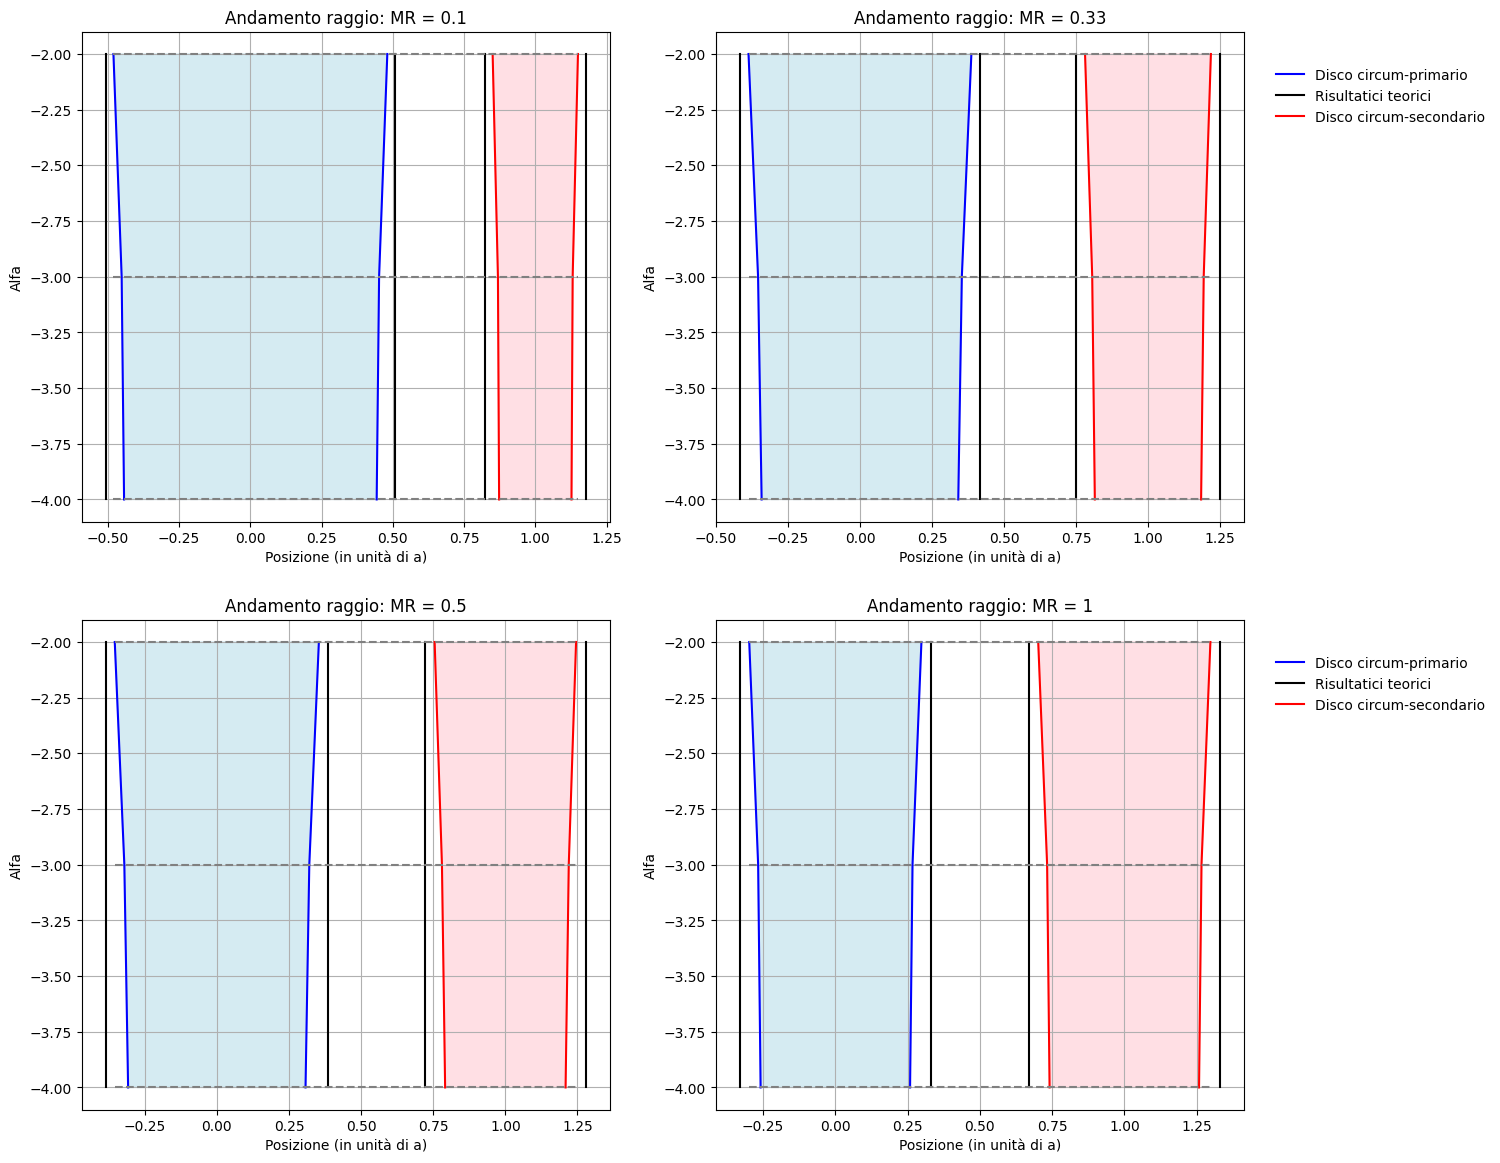

In [15]:
fig = plt.figure(figsize=(15, 14))

#Quantità necessarie per output
mass_ratio = np.array([0.1, 0.33, 0.5, 1])
alfa = np.array([-2, -3, -4])
x = np.zeros(3)
x_teo = np.zeros(3)


for i in range(0, 2):
    for j in range(0, 2):

        #Aggiungo il sub-plot
        axs = fig.add_subplot(2, 2, 2*i+j+1)

        x[0] = -sax_A2_e0[6-2*i-j]; x[1] = -sax_A3_e0[6-2*i-j]; x[2] = -sax_A4_e0[6-2*i-j]
        x_teo[0] = -sax_tr_2[0, 6-2*i-j]; x_teo[1] = -sax_tr_3[0, 6-2*i-j]; x_teo[2] = -sax_tr_4[0, 6-2*i-j]
        axs.plot(x, alfa, color = 'blue', label = 'Disco circum-primario')
        axs.plot(x_teo, alfa, color = 'black', label = 'Risultatici teorici')
        x[0] = sax_A2_e0[6-2*i-j]; x[1] = sax_A3_e0[6-2*i-j]; x[2] = sax_A4_e0[6-2*i-j]
        x_teo[0] = sax_tr_2[0, 6-2*i-j]; x_teo[1] = sax_tr_3[0, 6-2*i-j]; x_teo[2] = sax_tr_4[0, 6-2*i-j]
        axs.plot(x, alfa, color = 'blue')
        axs.plot(x_teo, alfa, color = 'black')
        x[0] = 1-sax_A2_e0[2*i+j]; x[1] = 1-sax_A3_e0[2*i+j]; x[2] = 1-sax_A4_e0[2*i+j]
        x_teo[0] = 1-sax_tr_2[0, 2*i+j]; x_teo[1] = 1-sax_tr_3[0, 2*i+j]; x_teo[2] = 1-sax_tr_4[0, 2*i+j]
        axs.plot(x, alfa, color = 'red', label = 'Disco circum-secondario')
        axs.plot(x_teo, alfa, color = 'black')
        x[0] = 1+sax_A2_e0[2*i+j]; x[1] = 1+sax_A3_e0[2*i+j]; x[2] = 1+sax_A4_e0[2*i+j]
        x_teo[0] = 1+sax_tr_2[0, 2*i+j]; x_teo[1] = 1+sax_tr_3[0, 2*i+j]; x_teo[2] = 1+sax_tr_4[0, 2*i+j]
        axs.plot(x, alfa, color = 'red')
        axs.plot(x_teo, alfa, color = 'black')


        #Regione riempimento disco primario
        x_fill = np.zeros(7)
        x_fill[0] = -sax_A2_e0[6-2*i-j]; x_fill[1] = -sax_A3_e0[6-2*i-j]; x_fill[2] = -sax_A4_e0[6-2*i-j]
        x_fill[3] = sax_A4_e0[6-2*i-j]; x_fill[4] = sax_A3_e0[6-2*i-j]; x_fill[5] = sax_A2_e0[6-2*i-j]; x_fill[6] = -sax_A2_e0[6-2*i-j]
        y_fill = np.zeros(7)
        y_fill[0] = -2; y_fill[1] = -3; y_fill[2] = -4 
        y_fill[3] = -4; y_fill[4] = -3; y_fill[5] = -2; y_fill[6] = -2

        axs.fill(x_fill, y_fill, color='lightblue', alpha=0.5)


        #Regione riempimento disco secondario
        x_fill[0] = 1-sax_A2_e0[2*i+j]; x_fill[1] = 1-sax_A3_e0[2*i+j]; x_fill[2] = 1-sax_A4_e0[2*i+j]
        x_fill[3] = 1+sax_A4_e0[2*i+j]; x_fill[4] = 1+sax_A3_e0[2*i+j]; x_fill[5] = 1+sax_A2_e0[2*i+j]
        x_fill[6] = 1-sax_A2_e0[2*i+j]
        y_fill[0] = -2; y_fill[1] = -3; y_fill[2] = -4 
        y_fill[3] = -4; y_fill[4] = -3; y_fill[5] = -2; y_fill[6] = -2

        axs.fill(x_fill, y_fill, color='pink', alpha=0.5)


        #Linee tratteggiate
        x_lin = np.array([-sax_A2_e0[6-2*i-j], 1+sax_A2_e0[2*i+j]])
        y = np.array([-2, -2]); axs.plot(x_lin, y, color = 'grey', linestyle = '--')
        y[0] = -3; y[1] = -3; axs.plot(x_lin, y, color = 'grey', linestyle = '--')
        y[0] = -4; y[1] = -4; axs.plot(x_lin, y, color = 'grey', linestyle = '--')

        axs.set_title(r'Andamento raggio: MR = ' + str(massr[2*i+j]))
        axs.set_ylabel('Alfa')
        axs.set_xlabel('Posizione (in unità di a)')

        if j==1:
            axs.legend(loc=(1.05, 0.8), frameon=False )

        axs.grid(True)

plt.show()

### Eccentricità: e = 0.3

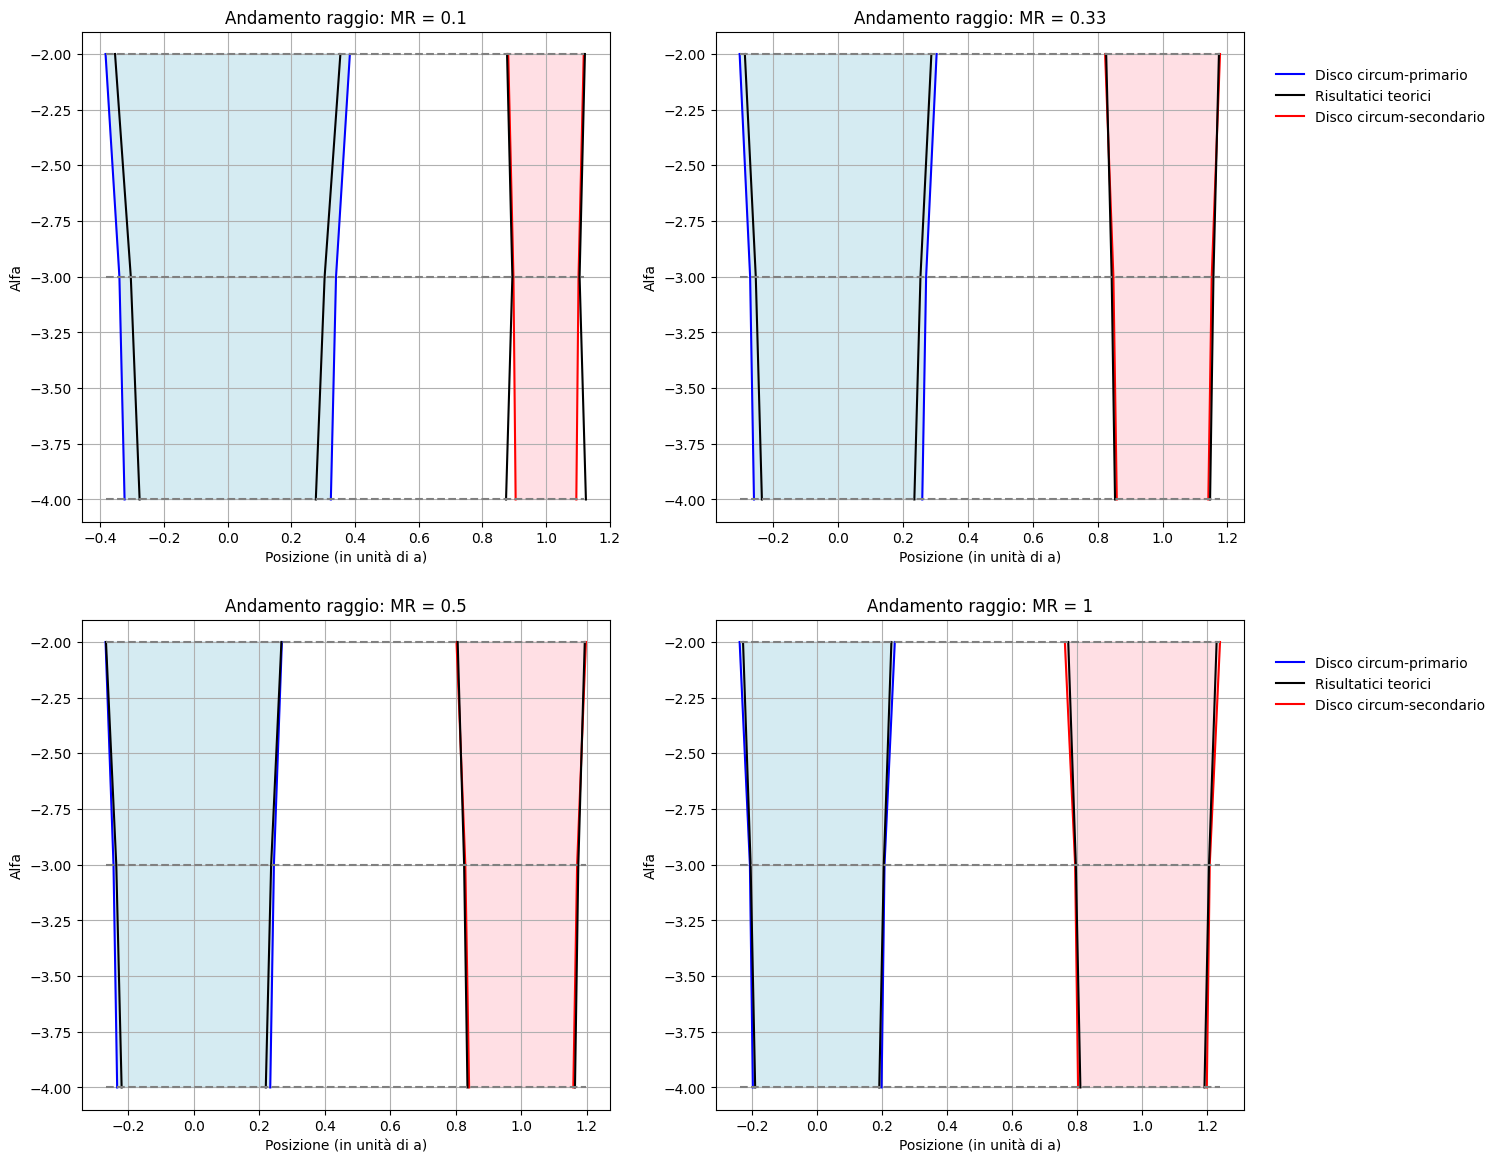

In [16]:
fig = plt.figure(figsize=(15, 14))

#Quantità necessarie per output
mass_ratio = np.array([0.1, 0.33, 0.5, 1])
alfa = np.array([-2, -3, -4])
x = np.zeros(3)
x_teo = np.zeros(3)


for i in range(0, 2):
    for j in range(0, 2):

        #Aggiungo il sub-plot
        axs = fig.add_subplot(2, 2, 2*i+j+1)

        x[0] = -sax_A2_e3[6-2*i-j]; x[1] = -sax_A3_e3[6-2*i-j]; x[2] = -sax_A4_e3[6-2*i-j]
        x_teo[0] = -sax_tr_2[1, 6-2*i-j]; x_teo[1] = -sax_tr_3[1, 6-2*i-j]; x_teo[2] = -sax_tr_4[1, 6-2*i-j]
        axs.plot(x, alfa, color = 'blue', label = 'Disco circum-primario')
        axs.plot(x_teo, alfa, color = 'black', label = 'Risultatici teorici')
        x[0] = sax_A2_e3[6-2*i-j]; x[1] = sax_A3_e3[6-2*i-j]; x[2] = sax_A4_e3[6-2*i-j]
        x_teo[0] = sax_tr_2[1, 6-2*i-j]; x_teo[1] = sax_tr_3[1, 6-2*i-j]; x_teo[2] = sax_tr_4[1, 6-2*i-j]
        axs.plot(x, alfa, color = 'blue')
        axs.plot(x_teo, alfa, color = 'black')
        x[0] = 1-sax_A2_e3[2*i+j]; x[1] = 1-sax_A3_e3[2*i+j]; x[2] = 1-sax_A4_e3[2*i+j]
        x_teo[0] = 1-sax_tr_2[1, 2*i+j]; x_teo[1] = 1-sax_tr_3[1, 2*i+j]; x_teo[2] = 1-sax_tr_4[1, 2*i+j]
        axs.plot(x, alfa, color = 'red', label = 'Disco circum-secondario')
        axs.plot(x_teo, alfa, color = 'black')
        x[0] = 1+sax_A2_e3[2*i+j]; x[1] = 1+sax_A3_e3[2*i+j]; x[2] = 1+sax_A4_e3[2*i+j]
        x_teo[0] = 1+sax_tr_2[1, 2*i+j]; x_teo[1] = 1+sax_tr_3[1, 2*i+j]; x_teo[2] = 1+sax_tr_4[1, 2*i+j]
        axs.plot(x, alfa, color = 'red')
        axs.plot(x_teo, alfa, color = 'black')


        #Regione riempimento disco primario
        x_fill = np.zeros(7)
        x_fill[0] = -sax_A2_e3[6-2*i-j]; x_fill[1] = -sax_A3_e3[6-2*i-j]; x_fill[2] = -sax_A4_e3[6-2*i-j]
        x_fill[3] = sax_A4_e3[6-2*i-j]; x_fill[4] = sax_A3_e3[6-2*i-j]; x_fill[5] = sax_A2_e3[6-2*i-j]; x_fill[6] = -sax_A2_e3[6-2*i-j]
        y_fill = np.zeros(7)
        y_fill[0] = -2; y_fill[1] = -3; y_fill[2] = -4 
        y_fill[3] = -4; y_fill[4] = -3; y_fill[5] = -2; y_fill[6] = -2

        axs.fill(x_fill, y_fill, color='lightblue', alpha=0.5)


        #Regione riempimento disco secondario
        x_fill[0] = 1-sax_A2_e3[2*i+j]; x_fill[1] = 1-sax_A3_e3[2*i+j]; x_fill[2] = 1-sax_A4_e3[2*i+j]
        x_fill[3] = 1+sax_A4_e3[2*i+j]; x_fill[4] = 1+sax_A3_e3[2*i+j]; x_fill[5] = 1+sax_A2_e3[2*i+j]
        x_fill[6] = 1-sax_A2_e3[2*i+j]
        y_fill[0] = -2; y_fill[1] = -3; y_fill[2] = -4 
        y_fill[3] = -4; y_fill[4] = -3; y_fill[5] = -2; y_fill[6] = -2

        axs.fill(x_fill, y_fill, color='pink', alpha=0.5)


        #Linee tratteggiate
        x_lin = np.array([-sax_A2_e3[6-2*i-j], 1+sax_A2_e3[2*i+j]])
        y = np.array([-2, -2]); axs.plot(x_lin, y, color = 'grey', linestyle = '--')
        y[0] = -3; y[1] = -3; axs.plot(x_lin, y, color = 'grey', linestyle = '--')
        y[0] = -4; y[1] = -4; axs.plot(x_lin, y, color = 'grey', linestyle = '--')

        axs.set_title(r'Andamento raggio: MR = ' + str(massr[2*i+j]))
        axs.set_ylabel('Alfa')
        axs.set_xlabel('Posizione (in unità di a)')

        if j==1:
            axs.legend(loc=(1.05, 0.8), frameon=False )

        axs.grid(True)

plt.show()

### Eccentricità: e = 0.6

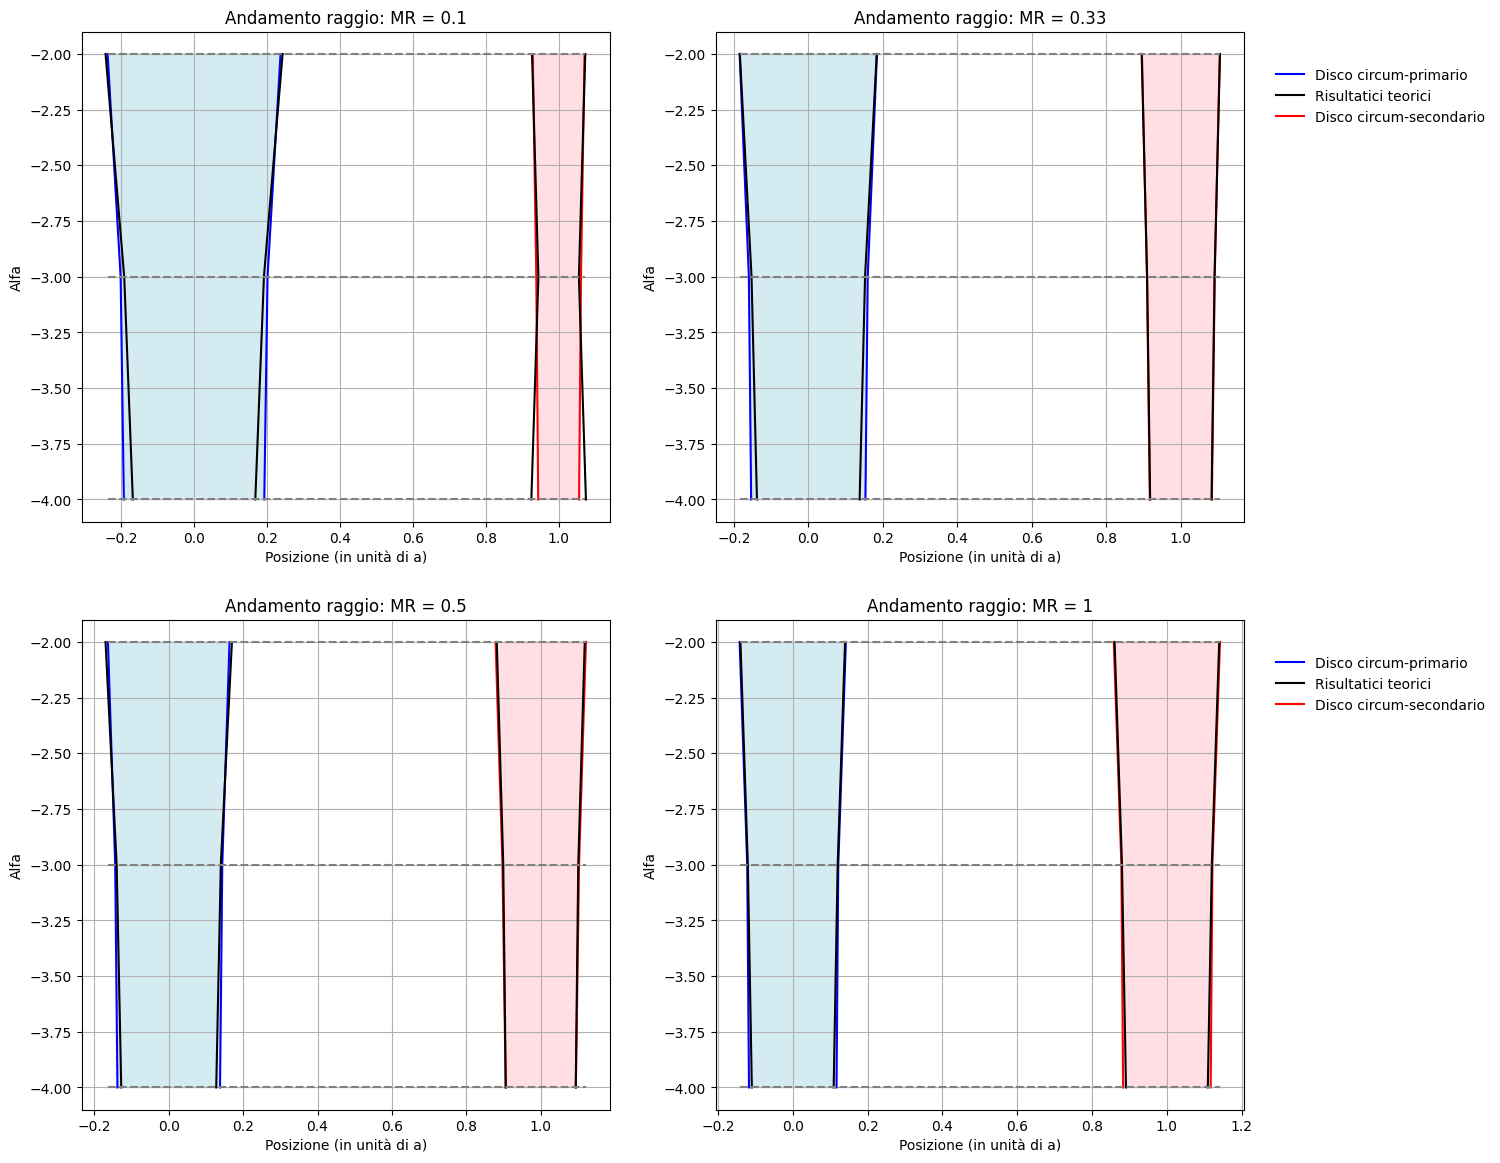

In [17]:
fig = plt.figure(figsize=(15, 14))

#Quantità necessarie per output
mass_ratio = np.array([0.1, 0.33, 0.5, 1])
alfa = np.array([-2, -3, -4])
x = np.zeros(3)
x_teo = np.zeros(3)


for i in range(0, 2):
    for j in range(0, 2):

        #Aggiungo il sub-plot
        axs = fig.add_subplot(2, 2, 2*i+j+1)

        x[0] = -sax_A2_e6[6-2*i-j]; x[1] = -sax_A3_e6[6-2*i-j]; x[2] = -sax_A4_e6[6-2*i-j]
        x_teo[0] = -sax_tr_2[2, 6-2*i-j]; x_teo[1] = -sax_tr_3[2, 6-2*i-j]; x_teo[2] = -sax_tr_4[2, 6-2*i-j]
        axs.plot(x, alfa, color = 'blue', label = 'Disco circum-primario')
        axs.plot(x_teo, alfa, color = 'black', label = 'Risultatici teorici')
        x[0] = sax_A2_e6[6-2*i-j]; x[1] = sax_A3_e6[6-2*i-j]; x[2] = sax_A4_e6[6-2*i-j]
        x_teo[0] = sax_tr_2[2, 6-2*i-j]; x_teo[1] = sax_tr_3[2, 6-2*i-j]; x_teo[2] = sax_tr_4[2, 6-2*i-j]
        axs.plot(x, alfa, color = 'blue')
        axs.plot(x_teo, alfa, color = 'black')
        x[0] = 1-sax_A2_e6[2*i+j]; x[1] = 1-sax_A3_e6[2*i+j]; x[2] = 1-sax_A4_e6[2*i+j]
        x_teo[0] = 1-sax_tr_2[2, 2*i+j]; x_teo[1] = 1-sax_tr_3[2, 2*i+j]; x_teo[2] = 1-sax_tr_4[2, 2*i+j]
        axs.plot(x, alfa, color = 'red', label = 'Disco circum-secondario')
        axs.plot(x_teo, alfa, color = 'black')
        x[0] = 1+sax_A2_e6[2*i+j]; x[1] = 1+sax_A3_e6[2*i+j]; x[2] = 1+sax_A4_e6[2*i+j]
        x_teo[0] = 1+sax_tr_2[2, 2*i+j]; x_teo[1] = 1+sax_tr_3[2, 2*i+j]; x_teo[2] = 1+sax_tr_4[2, 2*i+j]
        axs.plot(x, alfa, color = 'red')
        axs.plot(x_teo, alfa, color = 'black')


        #Regione riempimento disco primario
        x_fill = np.zeros(7)
        x_fill[0] = -sax_A2_e6[6-2*i-j]; x_fill[1] = -sax_A3_e6[6-2*i-j]; x_fill[2] = -sax_A4_e6[6-2*i-j]
        x_fill[3] = sax_A4_e6[6-2*i-j]; x_fill[4] = sax_A3_e6[6-2*i-j]; x_fill[5] = sax_A2_e6[6-2*i-j]; x_fill[6] = -sax_A2_e6[6-2*i-j]
        y_fill = np.zeros(7)
        y_fill[0] = -2; y_fill[1] = -3; y_fill[2] = -4 
        y_fill[3] = -4; y_fill[4] = -3; y_fill[5] = -2; y_fill[6] = -2

        axs.fill(x_fill, y_fill, color='lightblue', alpha=0.5)


        #Regione riempimento disco secondario
        x_fill[0] = 1-sax_A2_e6[2*i+j]; x_fill[1] = 1-sax_A3_e6[2*i+j]; x_fill[2] = 1-sax_A4_e6[2*i+j]
        x_fill[3] = 1+sax_A4_e6[2*i+j]; x_fill[4] = 1+sax_A3_e6[2*i+j]; x_fill[5] = 1+sax_A2_e6[2*i+j]
        x_fill[6] = 1-sax_A2_e6[2*i+j]
        y_fill[0] = -2; y_fill[1] = -3; y_fill[2] = -4 
        y_fill[3] = -4; y_fill[4] = -3; y_fill[5] = -2; y_fill[6] = -2

        axs.fill(x_fill, y_fill, color='pink', alpha=0.5)


        #Linee tratteggiate
        x_lin = np.array([-sax_A2_e6[6-2*i-j], 1+sax_A2_e6[2*i+j]])
        y = np.array([-2, -2]); axs.plot(x_lin, y, color = 'grey', linestyle = '--')
        y[0] = -3; y[1] = -3; axs.plot(x_lin, y, color = 'grey', linestyle = '--')
        y[0] = -4; y[1] = -4; axs.plot(x_lin, y, color = 'grey', linestyle = '--')

        axs.set_title(r'Andamento raggio: MR = ' + str(massr[2*i+j]))
        axs.set_ylabel('Alfa')
        axs.set_xlabel('Posizione (in unità di a)')

        if j==1:
            axs.legend(loc=(1.05, 0.8), frameon=False )

        axs.grid(True)

plt.show()

<center>

# <span style="color:red;"> Dimensioni del disco: confronto con i raggi </span>

<center>

<center>

## Viscosità minima

<center>

### Eccentricità binaria: e = 0.0

In [18]:
num = np.array([41, 41, 41, 41, 41, 41, 41])
dim = np.array([3.5, 4.0, 4.0, 8.0, 7.0, 7.0, 7.0])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])
rag_A4_e0 = np.zeros(7)


for h in range(0, 7):
    rag = np.zeros(num[h])

    #Determino i raggi corretti
    r = np.linspace(0.4, dim[h], 385)
    r_plot = np.zeros(384)
    for i in range(0, len(r_plot)):
        r_plot[i] = (r[i+1] - r[i])/2 + r[i]

    for k in range(0, num[h]):
        #Importo la densità considerata
        rho = np.fromfile("Alpha-4/NoEcc/MR"+massr[h]+"/gasdens" + str(60+k) + ".dat").reshape(384, 1152)
        massa = 0

        for i in range(0,384):
            #Calcolo area della singola sezione
            area = np.pi * (pow(r[i+1],2)-pow(r[i],2))
            area = area/1152

            for j in range(0, 1152):
                massa += area * rho[i, j]

        #Controllo ora dove ottengo il 90% della massa
        appo = 0
        raggio = 0

        for i in range(0,384):
            #Calcolo area della singola sezione
            area = np.pi * (pow(r[i+1],2)-pow(r[i],2))
            area = area/1152

            for j in range(0, 1152):
                appo += area * rho[i, j]
    
            if appo >= par_rag*massa:
                rag[k] = r_plot[i]
                break

    med = 0
    for i in range(0, len(rag)):
        med += rag[i]

    rag_A4_e0[h] = round(med/len(rag)/dist[h], 3)
    print('Il raggio di troncamento del disco con Mass-ratio =  ' + massr[h] + ' è pari a: ' + str(round(med/len(rag)/dist[h], 3)) + ' a')

Il raggio di troncamento del disco con Mass-ratio =  0.1 è pari a: 0.147 a
Il raggio di troncamento del disco con Mass-ratio =  0.33 è pari a: 0.212 a
Il raggio di troncamento del disco con Mass-ratio =  0.5 è pari a: 0.239 a
Il raggio di troncamento del disco con Mass-ratio =  1 è pari a: 0.3 a
Il raggio di troncamento del disco con Mass-ratio =  2 è pari a: 0.357 a
Il raggio di troncamento del disco con Mass-ratio =  3 è pari a: 0.394 a
Il raggio di troncamento del disco con Mass-ratio =  10 è pari a: 0.501 a


### Eccentricità binaria: e = 0.3

In [19]:
num = np.array([41, 41, 41, 41, 41, 41, 41])
rmax = np.array([3.0, 3.0, 3.5, 5.0, 5.0, 5.0, 6.0])
rmin = np.array([0.3, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])
rag_A4_e3 = np.zeros(7)


for h in range(0, 7):
    rag = np.zeros(num[h])

    #Determino i raggi corretti
    r = np.linspace(rmin[h], rmax[h], 385)
    r_plot = np.zeros(384)
    for i in range(0, len(r_plot)):
        r_plot[i] = (r[i+1] - r[i])/2 + r[i]

    for k in range(0, num[h]):
        #Importo la densità considerata
        rho = np.fromfile("Alpha-4/MedEcc/MR"+massr[h]+"/gasdens" + str(60+k) + ".dat").reshape(384, 1152)
        massa = 0

        for i in range(0,384):
            #Calcolo area della singola sezione
            area = np.pi * (pow(r[i+1],2)-pow(r[i],2))
            area = area/1152

            for j in range(0, 1152):
                massa += area * rho[i, j]

        #Controllo ora dove ottengo il 90% della massa
        appo = 0
        raggio = 0

        for i in range(0,384):
            #Calcolo area della singola sezione
            area = np.pi * (pow(r[i+1],2)-pow(r[i],2))
            area = area/1152

            for j in range(0, 1152):
                appo += area * rho[i, j]
    
            if appo >= par_rag*massa:
                rag[k] = r_plot[i]
                break

    med = 0
    for i in range(0, len(rag)):
        med += rag[i]

    rag_A4_e3[h] = round(med/len(rag)/dist[h], 3)
    print('Il raggio di troncamento del disco con Mass-ratio =  ' + massr[h] + ' è pari a: ' + str(round(med/len(rag)/dist[h], 3)) + ' a')

Il raggio di troncamento del disco con Mass-ratio =  0.1 è pari a: 0.105 a
Il raggio di troncamento del disco con Mass-ratio =  0.33 è pari a: 0.16 a
Il raggio di troncamento del disco con Mass-ratio =  0.5 è pari a: 0.179 a
Il raggio di troncamento del disco con Mass-ratio =  1 è pari a: 0.222 a
Il raggio di troncamento del disco con Mass-ratio =  2 è pari a: 0.262 a
Il raggio di troncamento del disco con Mass-ratio =  3 è pari a: 0.291 a
Il raggio di troncamento del disco con Mass-ratio =  10 è pari a: 0.374 a


### Eccentricità binaria: e = 0.6

In [20]:
num = np.array([41, 41, 41, 41, 41, 41, 41])
rmax = np.array([2.0, 2.5, 3.0, 4.0, 4.0, 4.0, 5.0])
rmin = np.array([0.2, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])
rag_A4_e6 = np.zeros(7)


for h in range(0, 7):
    rag = np.zeros(num[h])

    #Determino i raggi corretti
    r = np.linspace(rmin[h], rmax[h], 385)
    r_plot = np.zeros(384)
    for i in range(0, len(r_plot)):
        r_plot[i] = (r[i+1] - r[i])/2 + r[i]

    for k in range(0, num[h]):
        #Importo la densità considerata
        rho = np.fromfile("Alpha-4/HighEcc/MR"+massr[h]+"/gasdens" + str(60+k) + ".dat").reshape(384, 1152)
        massa = 0

        for i in range(0,384):
            #Calcolo area della singola sezione
            area = np.pi * (pow(r[i+1],2)-pow(r[i],2))
            area = area/1152

            for j in range(0, 1152):
                massa += area * rho[i, j]

        #Controllo ora dove ottengo il 90% della massa
        appo = 0
        raggio = 0

        for i in range(0,384):
            #Calcolo area della singola sezione
            area = np.pi * (pow(r[i+1],2)-pow(r[i],2))
            area = area/1152

            for j in range(0, 1152):
                appo += area * rho[i, j]
    
            if appo >= par_rag*massa:
                rag[k] = r_plot[i]
                break

    med = 0
    for i in range(0, len(rag)):
        med += rag[i]

    rag_A4_e6[h] = round(med/len(rag)/dist[h], 3)
    print('Il raggio di troncamento del disco con Mass-ratio =  ' + massr[h] + ' è pari a: ' + str(round(med/len(rag)/dist[h], 3)) + ' a')

Il raggio di troncamento del disco con Mass-ratio =  0.1 è pari a: 0.06 a
Il raggio di troncamento del disco con Mass-ratio =  0.33 è pari a: 0.094 a
Il raggio di troncamento del disco con Mass-ratio =  0.5 è pari a: 0.105 a
Il raggio di troncamento del disco con Mass-ratio =  1 è pari a: 0.13 a
Il raggio di troncamento del disco con Mass-ratio =  2 è pari a: 0.155 a
Il raggio di troncamento del disco con Mass-ratio =  3 è pari a: 0.175 a
Il raggio di troncamento del disco con Mass-ratio =  10 è pari a: 0.227 a


<center>

## Viscosità media

<center>

### Eccentricità binaria: e = 0.0

In [21]:
num = np.array([41, 41, 41, 41, 41, 41, 41])
dim = np.array([3.5, 4.0, 4.0, 8.0, 7.0, 7.0, 7.0])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])
rag_A3_e0 = np.zeros(7)


for h in range(0, 7):
    rag = np.zeros(num[h])

    #Determino i raggi corretti
    r = np.linspace(0.4, dim[h], 385)
    r_plot = np.zeros(384)
    for i in range(0, len(r_plot)):
        r_plot[i] = (r[i+1] - r[i])/2 + r[i]

    for k in range(0, num[h]):
        #Importo la densità considerata
        rho = np.fromfile("Alpha-3/NoEcc/MR"+massr[h]+"/gasdens" + str(60+k) + ".dat").reshape(384, 1152)
        massa = 0

        for i in range(0,384):
            #Calcolo area della singola sezione
            area = np.pi * (pow(r[i+1],2)-pow(r[i],2))
            area = area/1152

            for j in range(0, 1152):
                massa += area * rho[i, j]

        #Controllo ora dove ottengo il 90% della massa
        appo = 0
        raggio = 0

        for i in range(0,384):
            #Calcolo area della singola sezione
            area = np.pi * (pow(r[i+1],2)-pow(r[i],2))
            area = area/1152

            for j in range(0, 1152):
                appo += area * rho[i, j]
    
            if appo >= par_rag*massa:
                rag[k] = r_plot[i]
                break

    med = 0
    for i in range(0, len(rag)):
        med += rag[i]

    rag_A3_e0[h] = round(med/len(rag)/dist[h], 3)
    print('Il raggio di troncamento del disco con Mass-ratio =  ' + massr[h] + ' è pari a: ' + str(round(med/len(rag)/dist[h], 3)) + ' a')

Il raggio di troncamento del disco con Mass-ratio =  0.1 è pari a: 0.152 a
Il raggio di troncamento del disco con Mass-ratio =  0.33 è pari a: 0.222 a
Il raggio di troncamento del disco con Mass-ratio =  0.5 è pari a: 0.251 a
Il raggio di troncamento del disco con Mass-ratio =  1 è pari a: 0.311 a
Il raggio di troncamento del disco con Mass-ratio =  2 è pari a: 0.371 a
Il raggio di troncamento del disco con Mass-ratio =  3 è pari a: 0.407 a
Il raggio di troncamento del disco con Mass-ratio =  10 è pari a: 0.512 a


### Eccentricità binaria: e = 0.3

In [22]:
num = np.array([41, 41, 41, 41, 41, 41, 41])
rmax = np.array([3.0, 3.0, 3.5, 5.0, 5.0, 5.0, 6.0])
rmin = np.array([0.3, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])
rag_A3_e3 = np.zeros(7)


for h in range(0, 7):
    rag = np.zeros(num[h])

    #Determino i raggi corretti
    r = np.linspace(rmin[h], rmax[h], 385)
    r_plot = np.zeros(384)
    for i in range(0, len(r_plot)):
        r_plot[i] = (r[i+1] - r[i])/2 + r[i]

    for k in range(0, num[h]):
        #Importo la densità considerata
        rho = np.fromfile("Alpha-3/MedEcc/MR"+massr[h]+"/gasdens" + str(60+k) + ".dat").reshape(384, 1152)
        massa = 0

        for i in range(0,384):
            #Calcolo area della singola sezione
            area = np.pi * (pow(r[i+1],2)-pow(r[i],2))
            area = area/1152

            for j in range(0, 1152):
                massa += area * rho[i, j]

        #Controllo ora dove ottengo il 90% della massa
        appo = 0
        raggio = 0

        for i in range(0,384):
            #Calcolo area della singola sezione
            area = np.pi * (pow(r[i+1],2)-pow(r[i],2))
            area = area/1152

            for j in range(0, 1152):
                appo += area * rho[i, j]
    
            if appo >= par_rag*massa:
                rag[k] = r_plot[i]
                break

    med = 0
    for i in range(0, len(rag)):
        med += rag[i]

    rag_A3_e3[h] = round(med/len(rag)/dist[h], 3)
    print('Il raggio di troncamento del disco con Mass-ratio =  ' + massr[h] + ' è pari a: ' + str(round(med/len(rag)/dist[h], 3)) + ' a')

Il raggio di troncamento del disco con Mass-ratio =  0.1 è pari a: 0.112 a
Il raggio di troncamento del disco con Mass-ratio =  0.33 è pari a: 0.171 a
Il raggio di troncamento del disco con Mass-ratio =  0.5 è pari a: 0.192 a
Il raggio di troncamento del disco con Mass-ratio =  1 è pari a: 0.231 a
Il raggio di troncamento del disco con Mass-ratio =  2 è pari a: 0.272 a
Il raggio di troncamento del disco con Mass-ratio =  3 è pari a: 0.304 a
Il raggio di troncamento del disco con Mass-ratio =  10 è pari a: 0.388 a


### Eccentricità binaria: e = 0.6

In [23]:
num = np.array([41, 41, 41, 41, 41, 41, 41])
rmax = np.array([2.0, 2.5, 3.0, 4.0, 4.0, 4.0, 5.0])
rmin = np.array([0.2, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])
rag_A3_e6 = np.zeros(7)


for h in range(0, 7):
    rag = np.zeros(num[h])

    #Determino i raggi corretti
    r = np.linspace(rmin[h], rmax[h], 385)
    r_plot = np.zeros(384)
    for i in range(0, len(r_plot)):
        r_plot[i] = (r[i+1] - r[i])/2 + r[i]

    for k in range(0, num[h]):
        #Importo la densità considerata
        rho = np.fromfile("Alpha-3/HighEcc/MR"+massr[h]+"/gasdens" + str(60+k) + ".dat").reshape(384, 1152)
        massa = 0

        for i in range(0,384):
            #Calcolo area della singola sezione
            area = np.pi * (pow(r[i+1],2)-pow(r[i],2))
            area = area/1152

            for j in range(0, 1152):
                massa += area * rho[i, j]

        #Controllo ora dove ottengo il 90% della massa
        appo = 0
        raggio = 0

        for i in range(0,384):
            #Calcolo area della singola sezione
            area = np.pi * (pow(r[i+1],2)-pow(r[i],2))
            area = area/1152

            for j in range(0, 1152):
                appo += area * rho[i, j]
    
            if appo >= par_rag*massa:
                rag[k] = r_plot[i]
                break

    med = 0
    for i in range(0, len(rag)):
        med += rag[i]

    rag_A3_e6[h] = round(med/len(rag)/dist[h], 3)
    print('Il raggio di troncamento del disco con Mass-ratio =  ' + massr[h] + ' è pari a: ' + str(round(med/len(rag)/dist[h], 3)) + ' a')

Il raggio di troncamento del disco con Mass-ratio =  0.1 è pari a: 0.066 a
Il raggio di troncamento del disco con Mass-ratio =  0.33 è pari a: 0.104 a
Il raggio di troncamento del disco con Mass-ratio =  0.5 è pari a: 0.116 a
Il raggio di troncamento del disco con Mass-ratio =  1 è pari a: 0.135 a
Il raggio di troncamento del disco con Mass-ratio =  2 è pari a: 0.16 a
Il raggio di troncamento del disco con Mass-ratio =  3 è pari a: 0.18 a
Il raggio di troncamento del disco con Mass-ratio =  10 è pari a: 0.234 a


<center>

## Viscosità massima

<center>

### Eccentricità binaria: e = 0.0

In [24]:
num = np.array([41, 41, 41, 41, 41, 41, 41])
dim = np.array([3.5, 4.0, 5.0, 8.0, 7.0, 7.0, 7.0])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])
rag_A2_e0 = np.zeros(7)


for h in range(0, 7):
    rag = np.zeros(num[h])

    #Determino i raggi corretti
    r = np.linspace(0.4, dim[h], 385)
    r_plot = np.zeros(384)
    for i in range(0, len(r_plot)):
        r_plot[i] = (r[i+1] - r[i])/2 + r[i]

    for k in range(0, num[h]):
        #Importo la densità considerata
        rho = np.fromfile("Alpha-2/NoEcc/MR"+massr[h]+"/gasdens" + str(60+k) + ".dat").reshape(384, 1152)
        massa = 0

        for i in range(0,384):
            #Calcolo area della singola sezione
            area = np.pi * (pow(r[i+1],2)-pow(r[i],2))
            area = area/1152

            for j in range(0, 1152):
                massa += area * rho[i, j]

        #Controllo ora dove ottengo il 90% della massa
        appo = 0
        raggio = 0

        for i in range(0,384):
            #Calcolo area della singola sezione
            area = np.pi * (pow(r[i+1],2)-pow(r[i],2))
            area = area/1152

            for j in range(0, 1152):
                appo += area * rho[i, j]
    
            if appo >= par_rag*massa:
                rag[k] = r_plot[i]
                break

    med = 0
    for i in range(0, len(rag)):
        med += rag[i]

    rag_A2_e0[h] = round(med/len(rag)/dist[h], 3)
    print('Il raggio di troncamento del disco con Mass-ratio =  ' + massr[h] + ' è pari a: ' + str(round(med/len(rag)/dist[h], 3)) + ' a')

Il raggio di troncamento del disco con Mass-ratio =  0.1 è pari a: 0.176 a
Il raggio di troncamento del disco con Mass-ratio =  0.33 è pari a: 0.256 a
Il raggio di troncamento del disco con Mass-ratio =  0.5 è pari a: 0.286 a
Il raggio di troncamento del disco con Mass-ratio =  1 è pari a: 0.349 a
Il raggio di troncamento del disco con Mass-ratio =  2 è pari a: 0.414 a
Il raggio di troncamento del disco con Mass-ratio =  3 è pari a: 0.449 a
Il raggio di troncamento del disco con Mass-ratio =  10 è pari a: 0.554 a


### Eccentricità binaria: e = 0.3

In [25]:
rmax = np.array([3.0, 3.0, 3.5, 5.0, 5.0, 5.0, 6.0])
rmin = np.array([0.3, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])
rag_A2_e3 = np.zeros(7)


for h in range(0, 7):
    rag = np.zeros(num[h])

    #Determino i raggi corretti
    r = np.linspace(rmin[h], rmax[h], 385)
    r_plot = np.zeros(384)
    for i in range(0, len(r_plot)):
        r_plot[i] = (r[i+1] - r[i])/2 + r[i]

    for k in range(0, num[h]):
        #Importo la densità considerata
        rho = np.fromfile("Alpha-2/MedEcc/MR"+massr[h]+"/gasdens" + str(60+k) + ".dat").reshape(384, 1152)
        massa = 0

        for i in range(0,384):
            #Calcolo area della singola sezione
            area = np.pi * (pow(r[i+1],2)-pow(r[i],2))
            area = area/1152

            for j in range(0, 1152):
                massa += area * rho[i, j]

        #Controllo ora dove ottengo il 90% della massa
        appo = 0
        raggio = 0

        for i in range(0,384):
            #Calcolo area della singola sezione
            area = np.pi * (pow(r[i+1],2)-pow(r[i],2))
            area = area/1152

            for j in range(0, 1152):
                appo += area * rho[i, j]
    
            if appo >= par_rag*massa:
                rag[k] = r_plot[i]
                break

    med = 0
    for i in range(0, len(rag)):
        med += rag[i]

    rag_A2_e3[h] = round(med/len(rag)/dist[h], 3)
    print('Il raggio di troncamento del disco con Mass-ratio =  ' + massr[h] + ' è pari a: ' + str(round(med/len(rag)/dist[h], 3)) + ' a')

Il raggio di troncamento del disco con Mass-ratio =  0.1 è pari a: 0.13 a
Il raggio di troncamento del disco con Mass-ratio =  0.33 è pari a: 0.202 a
Il raggio di troncamento del disco con Mass-ratio =  0.5 è pari a: 0.224 a
Il raggio di troncamento del disco con Mass-ratio =  1 è pari a: 0.264 a
Il raggio di troncamento del disco con Mass-ratio =  2 è pari a: 0.293 a
Il raggio di troncamento del disco con Mass-ratio =  3 è pari a: 0.338 a
Il raggio di troncamento del disco con Mass-ratio =  10 è pari a: 0.427 a


### Eccentricità binaria: e = 0.6

In [26]:
rmax = np.array([2.0, 2.5, 3.0, 4.0, 4.0, 4.0, 5.0])
rmin = np.array([0.2, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])
rag_A2_e6 = np.zeros(7)


for h in range(0, 7):
    rag = np.zeros(num[h])

    #Determino i raggi corretti
    r = np.linspace(rmin[h], rmax[h], 385)
    r_plot = np.zeros(384)
    for i in range(0, len(r_plot)):
        r_plot[i] = (r[i+1] - r[i])/2 + r[i]

    for k in range(0, num[h]):
        #Importo la densità considerata
        rho = np.fromfile("Alpha-2/HighEcc/MR"+massr[h]+"/gasdens" + str(60+k) + ".dat").reshape(384, 1152)
        massa = 0

        for i in range(0,384):
            #Calcolo area della singola sezione
            area = np.pi * (pow(r[i+1],2)-pow(r[i],2))
            area = area/1152

            for j in range(0, 1152):
                massa += area * rho[i, j]

        #Controllo ora dove ottengo il 90% della massa
        appo = 0
        raggio = 0

        for i in range(0,384):
            #Calcolo area della singola sezione
            area = np.pi * (pow(r[i+1],2)-pow(r[i],2))
            area = area/1152

            for j in range(0, 1152):
                appo += area * rho[i, j]
    
            if appo >= par_rag*massa:
                rag[k] = r_plot[i]
                break

    med = 0
    for i in range(0, len(rag)):
        med += rag[i]

    rag_A2_e6[h] = round(med/len(rag)/dist[h], 3)
    print('Il raggio di troncamento del disco con Mass-ratio =  ' + massr[h] + ' è pari a: ' + str(round(med/len(rag)/dist[h], 3)) + ' a')

Il raggio di troncamento del disco con Mass-ratio =  0.1 è pari a: 0.076 a
Il raggio di troncamento del disco con Mass-ratio =  0.33 è pari a: 0.127 a
Il raggio di troncamento del disco con Mass-ratio =  0.5 è pari a: 0.14 a
Il raggio di troncamento del disco con Mass-ratio =  1 è pari a: 0.155 a
Il raggio di troncamento del disco con Mass-ratio =  2 è pari a: 0.18 a
Il raggio di troncamento del disco con Mass-ratio =  3 è pari a: 0.199 a
Il raggio di troncamento del disco con Mass-ratio =  10 è pari a: 0.283 a


<center>

## Confronto

<center>

In [27]:
per_A2_e0 = np.zeros(7); per_A2_e3 = np.zeros(7); per_A2_e6 = np.zeros(7)
per_A3_e0 = np.zeros(7); per_A3_e3 = np.zeros(7); per_A3_e6 = np.zeros(7)
per_A4_e0 = np.zeros(7); per_A4_e3 = np.zeros(7); per_A4_e6 = np.zeros(7)

mass_ratio = np.array([0.1, 0.33, 0.5, 1, 2, 3, 10])

for i in range(0, len(massr)):
    per_A2_e0[i] = 100 * (rag_A2_e0[i] - sax_A2_e0[i])/sax_A2_e0[i]
    per_A2_e3[i] = 100 * (rag_A2_e3[i] - sax_A2_e3[i])/sax_A2_e3[i]
    per_A2_e6[i] = 100 * (rag_A2_e6[i] - sax_A2_e6[i])/sax_A2_e6[i]
    per_A3_e0[i] = 100 * (rag_A3_e0[i] - sax_A3_e0[i])/sax_A3_e0[i]
    per_A3_e3[i] = 100 * (rag_A3_e3[i] - sax_A3_e3[i])/sax_A3_e3[i]
    per_A3_e6[i] = 100 * (rag_A3_e6[i] - sax_A3_e6[i])/sax_A3_e6[i]
    per_A4_e0[i] = 100 * (rag_A4_e0[i] - sax_A4_e0[i])/sax_A4_e0[i]
    per_A4_e3[i] = 100 * (rag_A4_e3[i] - sax_A4_e3[i])/sax_A4_e3[i]
    per_A4_e6[i] = 100 * (rag_A4_e6[i] - sax_A4_e6[i])/sax_A4_e6[i]


<center>

## Viscosità minima

<center>

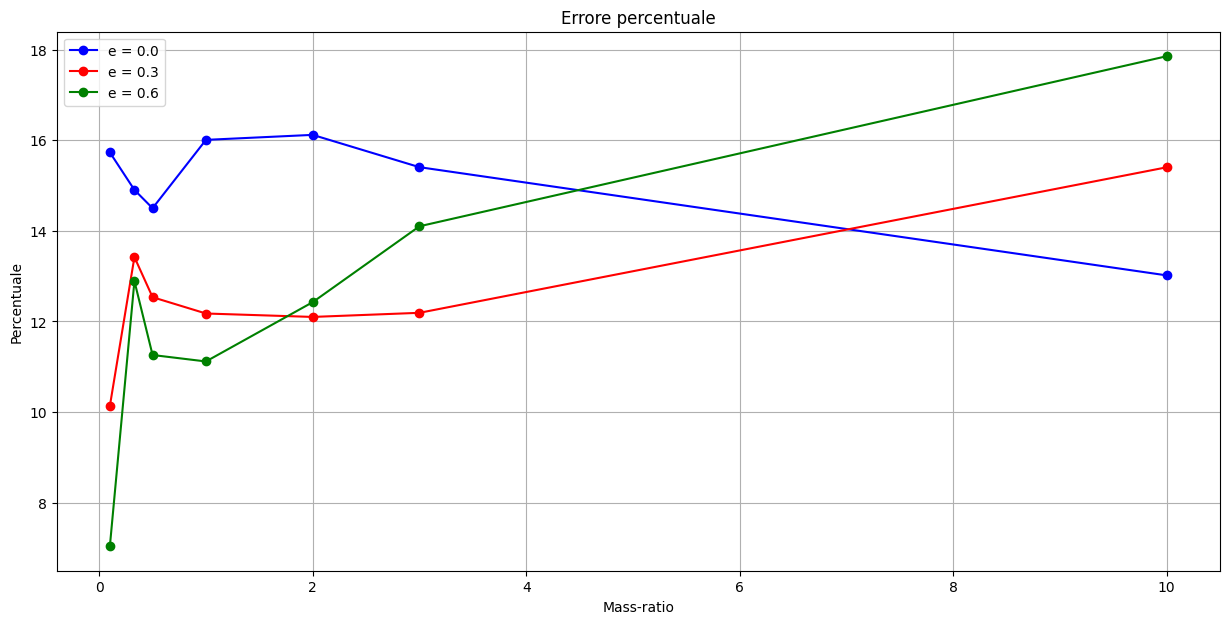

In [28]:
fig = plt.figure(figsize=(15, 7))

massr = np.array([0.1, 0.33, 0.5, 1, 2, 3, 10])

# Nessuna eccentricità
plt.plot(massr, per_A4_e0, color = 'blue', marker = 'o', label='e = 0.0')
# Eccentricità media
plt.plot(massr, per_A4_e3, color = 'red', marker = 'o', label='e = 0.3')
# Eccentricità massima
plt.plot(massr, per_A4_e6, color = 'green', marker = 'o', label='e = 0.6')


# Aggiungere etichette agli assi
plt.xlabel('Mass-ratio')
plt.ylabel('Percentuale')
plt.title('Errore percentuale')

# Aggiungere una legenda
plt.legend()

# Visualizzare il plot
plt.grid(True)
plt.show()

<center>

## Viscosità media

<center>

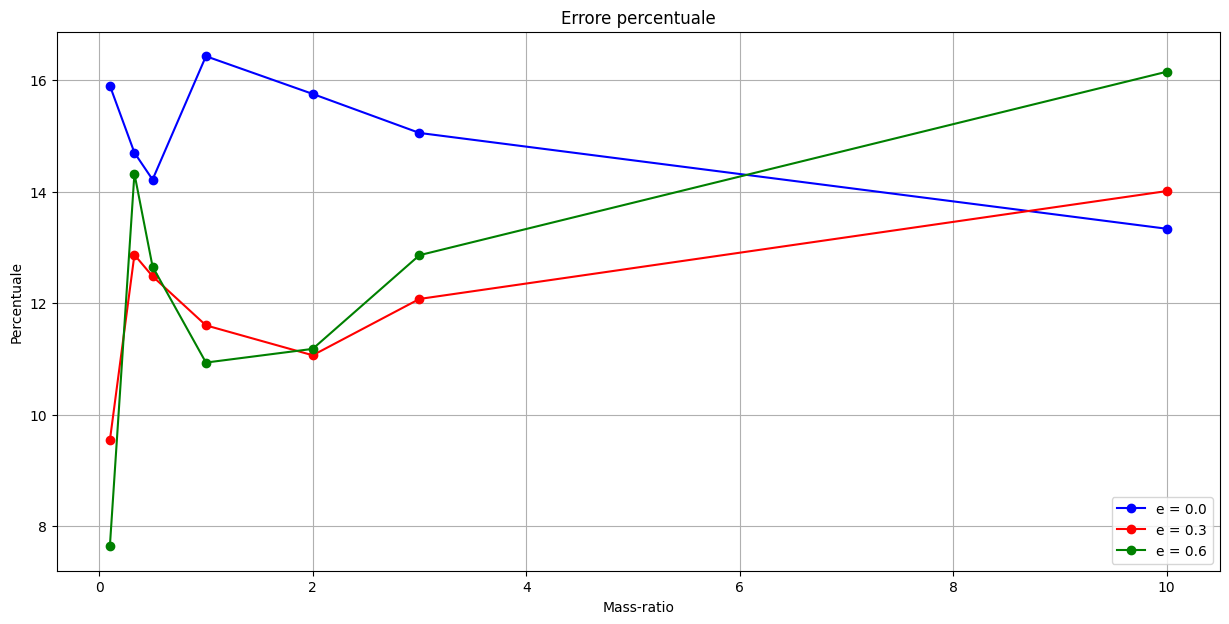

In [29]:
fig = plt.figure(figsize=(15, 7))

massr = np.array([0.1, 0.33, 0.5, 1, 2, 3, 10])

# Nessuna eccentricità
plt.plot(massr, per_A3_e0, color = 'blue', marker = 'o', label='e = 0.0')
# Eccentricità media
plt.plot(massr, per_A3_e3, color = 'red', marker = 'o', label='e = 0.3')
# Eccentricità massima
plt.plot(massr, per_A3_e6, color = 'green', marker = 'o', label='e = 0.6')


# Aggiungere etichette agli assi
plt.xlabel('Mass-ratio')
plt.ylabel('Percentuale')
plt.title('Errore percentuale')

# Aggiungere una legenda
plt.legend()

# Visualizzare il plot
plt.grid(True)
plt.show()

<center>

## Viscosità massima

<center>

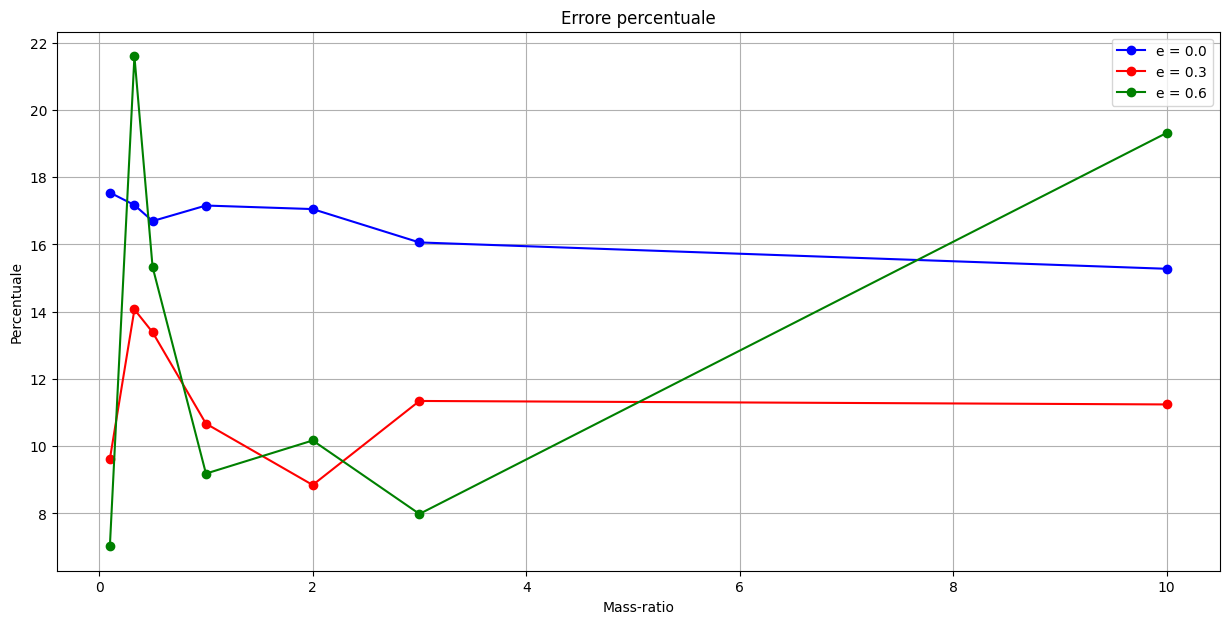

In [30]:
fig = plt.figure(figsize=(15, 7))

massr = np.array([0.1, 0.33, 0.5, 1, 2, 3, 10])

# Nessuna eccentricità
plt.plot(massr, per_A2_e0, color = 'blue', marker = 'o', label='e = 0.0')
# Eccentricità media
plt.plot(massr, per_A2_e3, color = 'red', marker = 'o', label='e = 0.3')
# Eccentricità massima
plt.plot(massr, per_A2_e6, color = 'green', marker = 'o', label='e = 0.6')


# Aggiungere etichette agli assi
plt.xlabel('Mass-ratio')
plt.ylabel('Percentuale')
plt.title('Errore percentuale')

# Aggiungere una legenda
plt.legend()

# Visualizzare il plot
plt.grid(True)
plt.show()

<center>

## Percentuale vs semi-asse

<center>

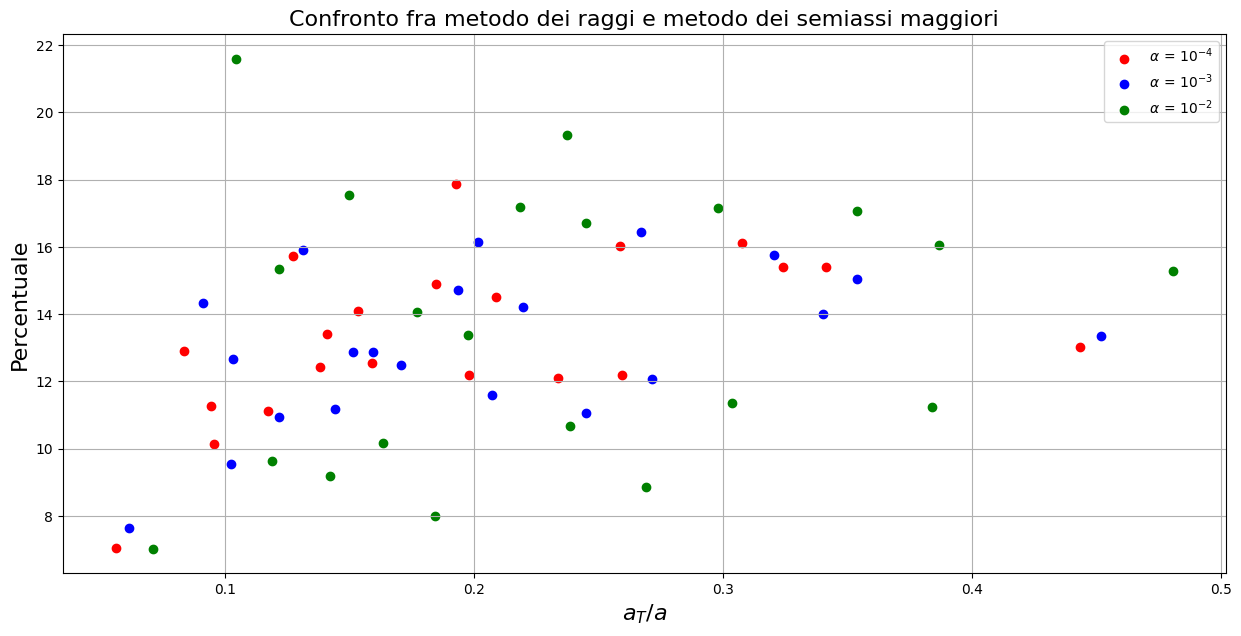

In [37]:
fig = plt.figure(figsize=(15, 7))

massr = np.array([0.1, 0.33, 0.5, 1, 2, 3, 10])


#-----------------------------------------#
#           Viscosità minima              #
#-----------------------------------------#
plt.scatter(sax_A4_e0, per_A4_e0, color = 'red', marker = 'o', label=r'$\alpha\,=\,10^{-4}$')
plt.scatter(sax_A4_e3, per_A4_e3, color = 'red', marker = 'o')
plt.scatter(sax_A4_e6, per_A4_e6, color = 'red', marker = 'o')

#-----------------------------------------#
#            Viscosità media              #
#-----------------------------------------#
plt.scatter(sax_A3_e0, per_A3_e0, color = 'blue', marker = 'o', label=r'$\alpha\,=\,10^{-3}$')
plt.scatter(sax_A3_e3, per_A3_e3, color = 'blue', marker = 'o')
plt.scatter(sax_A3_e6, per_A3_e6, color = 'blue', marker = 'o')

#-----------------------------------------#
#           Viscosità massima             #
#-----------------------------------------#
plt.scatter(sax_A2_e0, per_A2_e0, color = 'green', marker = 'o', label=r'$\alpha\,=\,10^{-2}$')
plt.scatter(sax_A2_e3, per_A2_e3, color = 'green', marker = 'o')
plt.scatter(sax_A2_e6, per_A2_e6, color = 'green', marker = 'o')



# Aggiungere etichette agli assi
plt.xlabel(r'$a_T/a$', fontsize = 16)
plt.ylabel('Percentuale', fontsize = 16)
plt.title('Confronto fra metodo dei raggi e metodo dei semiassi maggiori', fontsize = 16)

# Aggiungere una legenda
plt.legend()

# Visualizzare il plot
plt.grid(True)
plt.show()

<center>

## Eccentricità binaria: e = 0.0

<center>

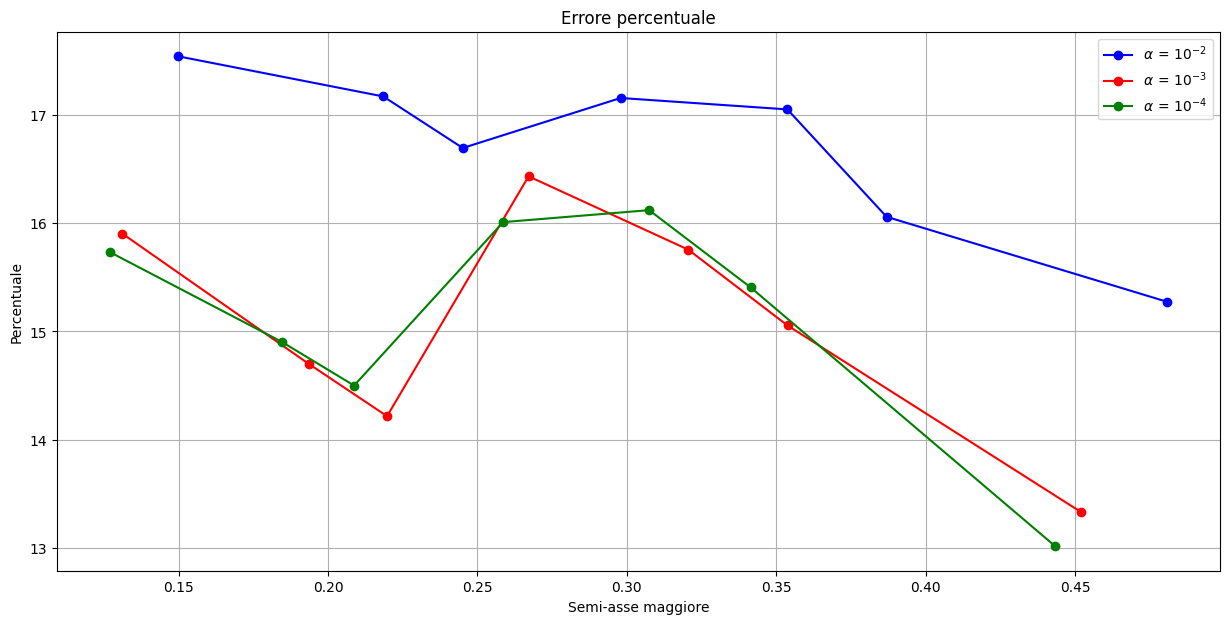

In [32]:
fig = plt.figure(figsize=(15, 7))

# Nessuna eccentricità
plt.plot(sax_A2_e0, per_A2_e0, color = 'blue', marker = 'o', label=r'$\alpha\,=\,10^{-2}$')
plt.plot(sax_A3_e0, per_A3_e0, color = 'red', marker = 'o', label=r'$\alpha\,=\,10^{-3}$')
plt.plot(sax_A4_e0, per_A4_e0, color = 'green', marker = 'o', label=r'$\alpha\,=\,10^{-4}$')


# Aggiungere etichette agli assi
plt.xlabel('Semi-asse maggiore')
plt.ylabel('Percentuale')
plt.title('Errore percentuale')

# Aggiungere una legenda
plt.legend()

# Visualizzare il plot
plt.grid(True)
plt.show()

<center>

## Eccentricità binaria: e = 0.3

<center>

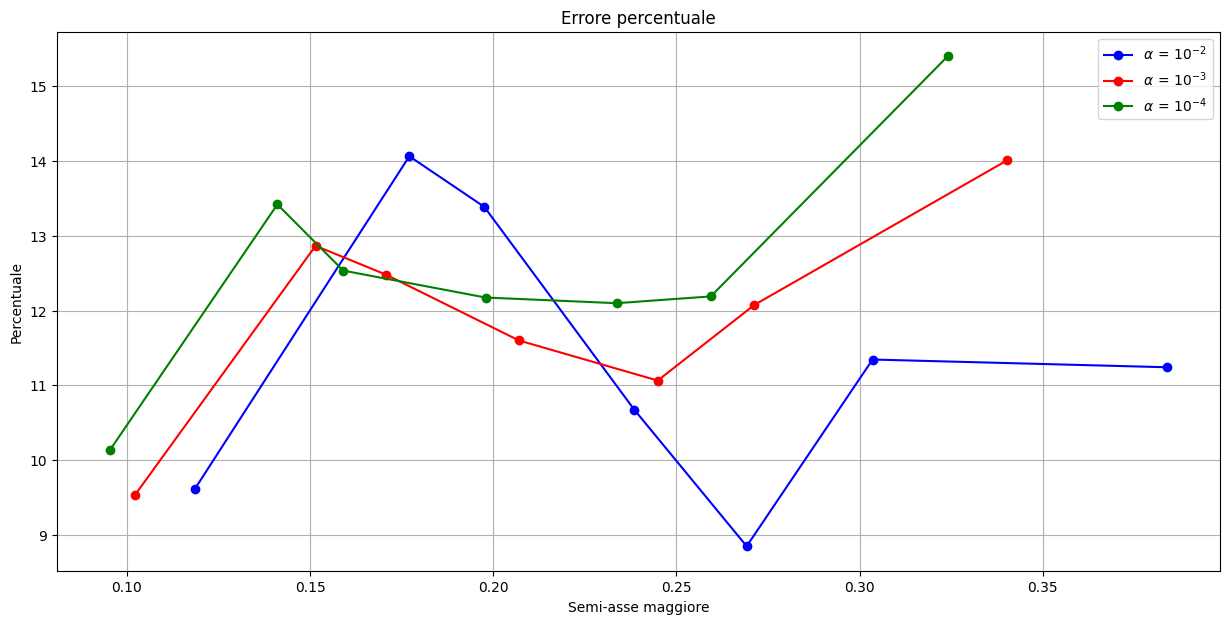

In [33]:
fig = plt.figure(figsize=(15, 7))

# Nessuna eccentricità
plt.plot(sax_A2_e3, per_A2_e3, color = 'blue', marker = 'o', label=r'$\alpha\,=\,10^{-2}$')
plt.plot(sax_A3_e3, per_A3_e3, color = 'red', marker = 'o', label=r'$\alpha\,=\,10^{-3}$')
plt.plot(sax_A4_e3, per_A4_e3, color = 'green', marker = 'o', label=r'$\alpha\,=\,10^{-4}$')


# Aggiungere etichette agli assi
plt.xlabel('Semi-asse maggiore')
plt.ylabel('Percentuale')
plt.title('Errore percentuale')

# Aggiungere una legenda
plt.legend()

# Visualizzare il plot
plt.grid(True)
plt.show()

<center>

## Eccentricità binaria: e = 0.6

<center>

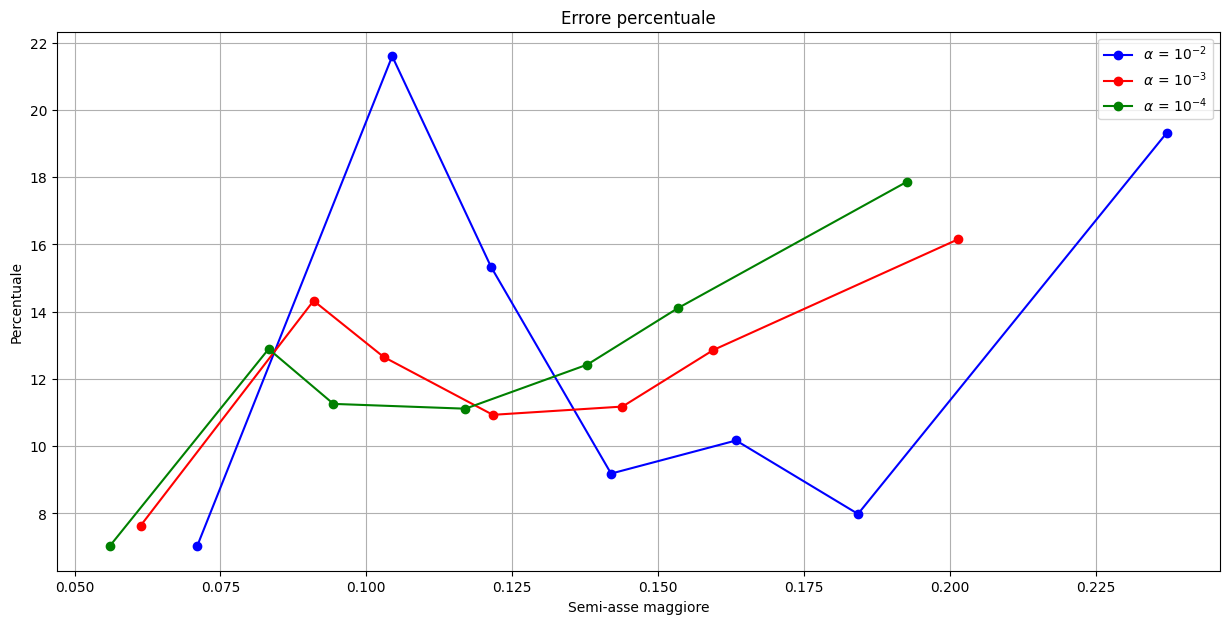

In [34]:
fig = plt.figure(figsize=(15, 7))

# Nessuna eccentricità
plt.plot(sax_A2_e6, per_A2_e6, color = 'blue', marker = 'o', label=r'$\alpha\,=\,10^{-2}$')
plt.plot(sax_A3_e6, per_A3_e6, color = 'red', marker = 'o', label=r'$\alpha\,=\,10^{-3}$')
plt.plot(sax_A4_e6, per_A4_e6, color = 'green', marker = 'o', label=r'$\alpha\,=\,10^{-4}$')


# Aggiungere etichette agli assi
plt.xlabel('Semi-asse maggiore')
plt.ylabel('Percentuale')
plt.title('Errore percentuale')

# Aggiungere una legenda
plt.legend()

# Visualizzare il plot
plt.grid(True)
plt.show()